## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni 
* Blog post URL: TBD


# obtaining data

In [53]:
# Your code here - remember to use markdown cells for comments as well!
# Import statements go here
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

kc = pd.read_csv('kc_house_data.csv',index_col=None,encoding='latin1')
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## retrieve data information

In [2]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# scrubbing and cleaning Data

## run timestamp data conversion  

In [3]:
def general_datetime_converter(df, col):
    df_clone = df.copy()
    df_clone[col] = pd.to_datetime(df_clone[col])
    return df_clone

kc2 = general_datetime_converter(kc, 'date')
kc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

## read missing and symbolic values

In [4]:
def check_cols(df):
    for col in df.columns:
        print('------------------------------------------------------')
        print(col)
        print(f'unique values: {df[col].nunique(dropna=False)} (\'NaN\' included)')
        print(f'NaN exists? {df[col].isna().any()}')
        if df[col].isna().any():
            print(f'how many \'NaN\' values? {df[col].isna().sum()} ({np.divide(df[col].isna().sum(),df.shape[0])*100:.2f}%)')
        print('------------------------------------------------------')
        print(df[col].value_counts(dropna=False, normalize=True))
        print('------------------------------------------------------')
        print('\n') # Break up the output between columns
        
    return None

check_cols(kc2)

------------------------------------------------------
id
unique values: 21420 ('NaN' included)
NaN exists? False
------------------------------------------------------
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64
------------------------------------------------------


------------------------------------------------------
date
unique values: 372 ('NaN' included)
NaN exists? False
------------------------------------------------------
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
                ...   
2014-07-27    0.000046
2015-03-08    0.000046
2014-11-02    0.000046
2015-05-15    0.000046
2015-05-24    0.000046
Name: date, Length: 372, dtype: float64
-------------------

## remove erratic symbols

In [5]:
# Your code here - Manipulate column names
subs = [(' ','_'),('.',''),("'",""),('®',''),('Â',''),('â\x84¢',''),('+','plus'),('½','half'),('-','_')]

def transform_colname(df):
    df_clone = df.copy()
    cols_rename = []
    for col in df_clone.columns:
        for old, new in subs:
            col = col.replace(old,new)
        cols_rename.append(col)
    df_clone.columns = cols_rename
    return df_clone

In [6]:
def convert_obj_to_num(df, col):
    df_clone = df.copy()
    if df_clone[col].dtype == 'object':
        df_clone[col] = df_clone[col].replace({'?':np.NaN}).astype('float64')
    return df_clone

kc3 = convert_obj_to_num(kc2, 'sqft_basement')
kc3.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## replace missing values

In [7]:
def find_null_cols(df):
    df_clone = df.copy()
    print('\'NaN\' found in columns as follows:')
    for col in df_clone.columns:
        if (df_clone[col].isnull().any()) | (df_clone[col].isna().any()):
            print(f'\t{col:30} contains {df_clone[col].isna().sum():10} null values ({df_clone[col].isna().sum()*100/df_clone.shape[0]:5.2f}%) !')
    return None

find_null_cols(kc3)

'NaN' found in columns as follows:
	waterfront                     contains       2376 null values (11.00%) !
	view                           contains         63 null values ( 0.29%) !
	sqft_basement                  contains        454 null values ( 2.10%) !
	yr_renovated                   contains       3842 null values (17.79%) !


### continuous features

In [8]:
def fill_null_cols(df, col, nullified=False):
    df_clone = df.copy()
    if nullified:
        df_clone[col] = df_clone[col].fillna(0)
    else:
        try:
            median = df_clone[col].median()
            mean = df_clone[col].mean()
            print(f'{col}: median {median:.3f}, mean {mean:.3f}')
            if median > 0:
                df_clone[col] = df_clone[col].fillna(median)
            else:
                df_clone[col] = df_clone[col].fillna(mean)
        except:
            print('N/A')
    return df_clone

In [9]:
kc4 = fill_null_cols(kc3, 'sqft_basement', nullified=False)
kc4.sqft_basement.isna().any()

sqft_basement: median 0.000, mean 291.852


False

In [10]:
kc5 = fill_null_cols(kc4, 'yr_renovated', nullified=True)
print(kc5.yr_renovated.isna().any())
kc5.yr_renovated.unique()

False


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

### discrete, categorical features

In [11]:
def replace_null_cols(df, col, obj=False):
    df_clone = df.copy()
    if obj:
        df_clone[col] = df_clone[col].fillna('unknown')
    else:
        #df_clone[col] = df_clone[col].fillna(-1)
        # Thomas T. 
        df_clone[col] = df_clone[col].fillna(0)
    return df_clone

In [12]:
kc6 = replace_null_cols(kc5, 'waterfront', obj=False)
kc6.waterfront.isna().any()

False

In [13]:
kc7 = replace_null_cols(kc6, 'view', obj=False)
kc7.view.isna().any()

False

In [14]:
def transform_col_to_binary(df, col):
    df_clone = df.copy()
    df_clone[col+'_korg'] = df_clone[col]
    for idx in range(df_clone.shape[0]):
        if df_clone.loc[idx,col] > 0:
            df_clone.loc[idx,col] = 1
    return df_clone

In [15]:
kc7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [16]:
kc8 = transform_col_to_binary(kc7, 'yr_renovated')
print('any NaN?',kc8.yr_renovated.isna().sum())
print(kc8.yr_renovated.nunique())
print('after:',kc8.yr_renovated.unique())
print('before:',kc8.yr_renovated_korg.unique())

any NaN? 0
2
after: [0. 1.]
before: [   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


## remove duplications

In [17]:
def check_remove_duplicated_data(df):
    df_clone = df.copy()
    #df_clone['is_duplicated'] = df_clone.duplicated(subset=None, keep='first')
    do_drop = '0'
    for col in df_clone.columns:
        print(f'{col} contains duplications?')
        if df_clone[col].duplicated().value_counts(normalize=True, sort=False)[0] == 1:
            print('Nope!')
        else:
            print(f'Yes, how much? {df_clone[col].duplicated().value_counts(normalize=True, sort=False)[1]}')
            do_drop = input('drop? enter 1 (\'True\') or 0 (\'False\')')
            if do_drop == '1':
                df_clone[col+'_kdup'] = df_clone[col]
                #df_clone[col] = df_clone[col].drop_duplicates(keep='first') 
                # Thomas T.
                df_clone[col] = df_clone[col].drop_duplicates(keep='last')
                print(f' duplications in {col} dropped ... ')
            else:
                print(f' skip {col} ... ')
        print('---------------------------------------------------------------------------')
    return df_clone

In [18]:
kc9 = check_remove_duplicated_data(kc8)
kc9.columns

id contains duplications?
Yes, how much? 0.008195582719822198
drop? enter 1 ('True') or 0 ('False')1
 duplications in id dropped ... 
---------------------------------------------------------------------------
date contains duplications?
Yes, how much? 0.9827753854702042
drop? enter 1 ('True') or 0 ('False')0
 skip date ... 
---------------------------------------------------------------------------
price contains duplications?
Yes, how much? 0.832291521970644
drop? enter 1 ('True') or 0 ('False')0
 skip price ... 
---------------------------------------------------------------------------
bedrooms contains duplications?
Yes, how much? 0.9994443672732324
drop? enter 1 ('True') or 0 ('False')0
 skip bedrooms ... 
---------------------------------------------------------------------------
bathrooms contains duplications?
Yes, how much? 0.9986572209103116
drop? enter 1 ('True') or 0 ('False')0
 skip bathrooms ... 
---------------------------------------------------------------------------

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated_korg',
       'id_kdup'],
      dtype='object')

## remove extreme outliers

In [19]:
def remove_outliers(df):
    df_clone = df.copy()
    cuts = []
    do_work = '0'
    do_cut = '0'
    read_cut = '0'
    
    for col in df_clone.columns:
        print('\n')
        print('***************************************************************************')
        print(f'{col} (data type: {df_clone[col].dtype}):')
        print(f'>>>>>> remaining data size {df_clone.shape[0]} wrt {df.shape[0]}')
        print(f'>>>>>> Percent remained (previous cuts applied): {round(df_clone.shape[0]/df.shape[0],3)}')
        do_work = input('wanna continue? enter 1 (\'True\') or 0 (\'False\')')
        if do_work == '1':    
            print ('----------------------------------------------------------------------')
            print(df_clone[col].value_counts(dropna=False,normalize=True))
            print ('----------------------------------------------------------------------')
            q75, q25 = np.percentile(df_clone[col], [75 ,25])
            iqr = q75 - q25
            minVal = q25 - (1.73 * iqr)
            maxVal = q75 + (1.73 * iqr)
            print(f'*** IQR: {iqr:.6f} ********* ') 
            print(f'*** minValue: {minVal:.6f} *** ') 
            print(f'*** maxValue: {maxVal:.6f} *** ')
            print('-----------------------------------------------------------------------')
            do_cut = input('make cut? enter 1 (\'True\') or 0 (\'False\')')
            if (maxVal == minVal) & (do_cut == '1'):
                do_cut = 0
                print('minimal and maximal values are the same. cut not recommended.')
            if do_cut == '1':
                print(f'\tcut on {col} applied ... ')   
                try:
                    orig_tot = df.shape[0]
                    df_cut = df_clone.copy()
                    df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                    df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                    print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                    cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                except Exception as e:
                    print('\t\t>>> Sorry! ',e)
            else:
                print(f'\tskip {col} ... ')
                read_cut = input('\tbut... wanna read cut? enter 1 (\'True\') or 0 (\'False\')')
                if read_cut == '1':
                    try:
                        orig_tot = df_clone.shape[0]
                        df_cut = df_clone.copy()
                        df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                        df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                        print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                        cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                    except Exception as e:
                        print('\t\t>>> Sorry! ',e)
                    df_clone = df.copy()
                else:
                    cuts.append([col,0.,0.,0.,0.])
        else:
            cuts.append([col,0.,0.,0.,0.])
            continue
        input("Press Enter to continue...")
    return cuts, df_clone

### removal of extreme outliers (Q1 - 1.73 * IQR , Q3 + 1.73 * IQR) ; uncomment lines below

In [20]:
#results, kc10 = remove_outliers(kc9)
#print(kc10.columns)
#results

In [21]:
kc9['yr_sold'] = kc9['date'].dt.year
kc9['mo_sold'] = kc9['date'].dt.month
print(kc9.dtypes)
kc9.head()

id                          float64
date                 datetime64[ns]
price                       float64
bedrooms                      int64
bathrooms                   float64
sqft_living                   int64
sqft_lot                      int64
floors                      float64
waterfront                  float64
view                        float64
condition                     int64
grade                         int64
sqft_above                    int64
sqft_basement               float64
yr_built                      int64
yr_renovated                float64
zipcode                       int64
lat                         float64
long                        float64
sqft_living15                 int64
sqft_lot15                    int64
yr_renovated_korg           float64
id_kdup                       int64
yr_sold                       int64
mo_sold                       int64
dtype: object


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7.129301e+09 2014-10-13  221900.0         3       1.00         1180   
1  6.414100e+09 2014-12-09  538000.0         3       2.25         2570   
2  5.631500e+09 2015-02-25  180000.0         2       1.00          770   
3  2.487201e+09 2014-12-09  604000.0         4       3.00         1960   
4  1.954401e+09 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         0.0   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...           1.0    98125  47.7210   
2     10000     1.0         0.0   0.0  ...           0.0    98028  47.7379   
3      5000     1.0         0.0   0.0  ...           0.0    98136  47.5208   
4      8080     1.0         0.0   0.0  ...           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  yr_renovated_korg     id_kdup  yr_sold  \
0 -122.257           1340        5650                0.0  7129300520     2014   
1 -122.319           1690        7639             1991.0  6414100192     2014   
2 -122.233           2720        8062                0.0  5631500400     2015   
3 -122.393           1360        5000                0.0  2487200875     2014   
4 -122.045           1800        7503                0.0  1954400510     2015   

   mo_sold  
0       10  
1       12  
2        2  
3       12  
4        2  

[5 rows x 25 columns]

In [22]:
kc10 = kc9.drop(['date'],axis=1)
kc10.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7.129301e+09  221900.0         3       1.00         1180      5650     1.0   
1  6.414100e+09  538000.0         3       2.25         2570      7242     2.0   
2  5.631500e+09  180000.0         2       1.00          770     10000     1.0   
3  2.487201e+09  604000.0         4       3.00         1960      5000     1.0   
4  1.954401e+09  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0         0.0   0.0          3  ...           0.0    98178  47.5112 -122.257   
1         0.0   0.0          3  ...           1.0    98125  47.7210 -122.319   
2         0.0   0.0          3  ...           0.0    98028  47.7379 -122.233   
3         0.0   0.0          5  ...           0.0    98136  47.5208 -122.393   
4         0.0   0.0          3  ...           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  yr_renovated_korg     id_kdup  yr_sold  mo_sold  
0           1340        5650                0.0  7129300520     2014       10  
1           1690        7639             1991.0  6414100192     2014       12  
2           2720        8062                0.0  5631500400     2015        2  
3           1360        5000                0.0  2487200875     2014       12  
4           1800        7503                0.0  1954400510     2015        2  

[5 rows x 24 columns]

# exploring data

## count unique values 

In [23]:
def unique_features_plt(df):
    df_clone = df.copy()
    df_clone = df_clone.loc[:, df_clone.dtypes != 'object']
    print(df_clone.columns)
    print(df_clone.nunique())
    
    fig, ax = plt.subplots(1,1,figsize = (15, 5)) 
    plt.bar(df_clone.columns,df_clone.nunique(),color='green',alpha=0.4,width=0.2)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()
    
    return None

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_renovated_korg', 'id_kdup',
       'yr_sold', 'mo_sold'],
      dtype='object')
id                   21420
price                 3622
bedrooms                12
bathrooms               29
sqft_living           1034
sqft_lot              9776
floors                   6
waterfront               2
view                     5
condition                5
grade                   11
sqft_above             942
sqft_basement          304
yr_built               116
yr_renovated             2
zipcode                 70
lat                   5033
long                   751
sqft_living15          777
sqft_lot15            8682
yr_renovated_korg       70
id_kdup              21420
yr_sold                  2
mo_sold                 12
dty

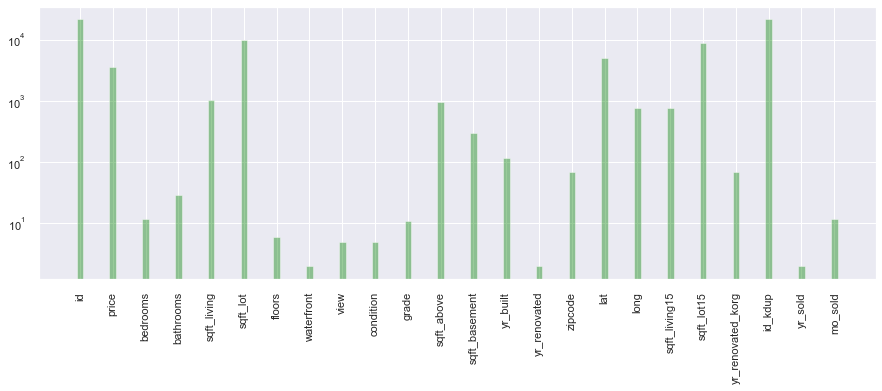

In [24]:
unique_features_plt(kc10)

## understand data

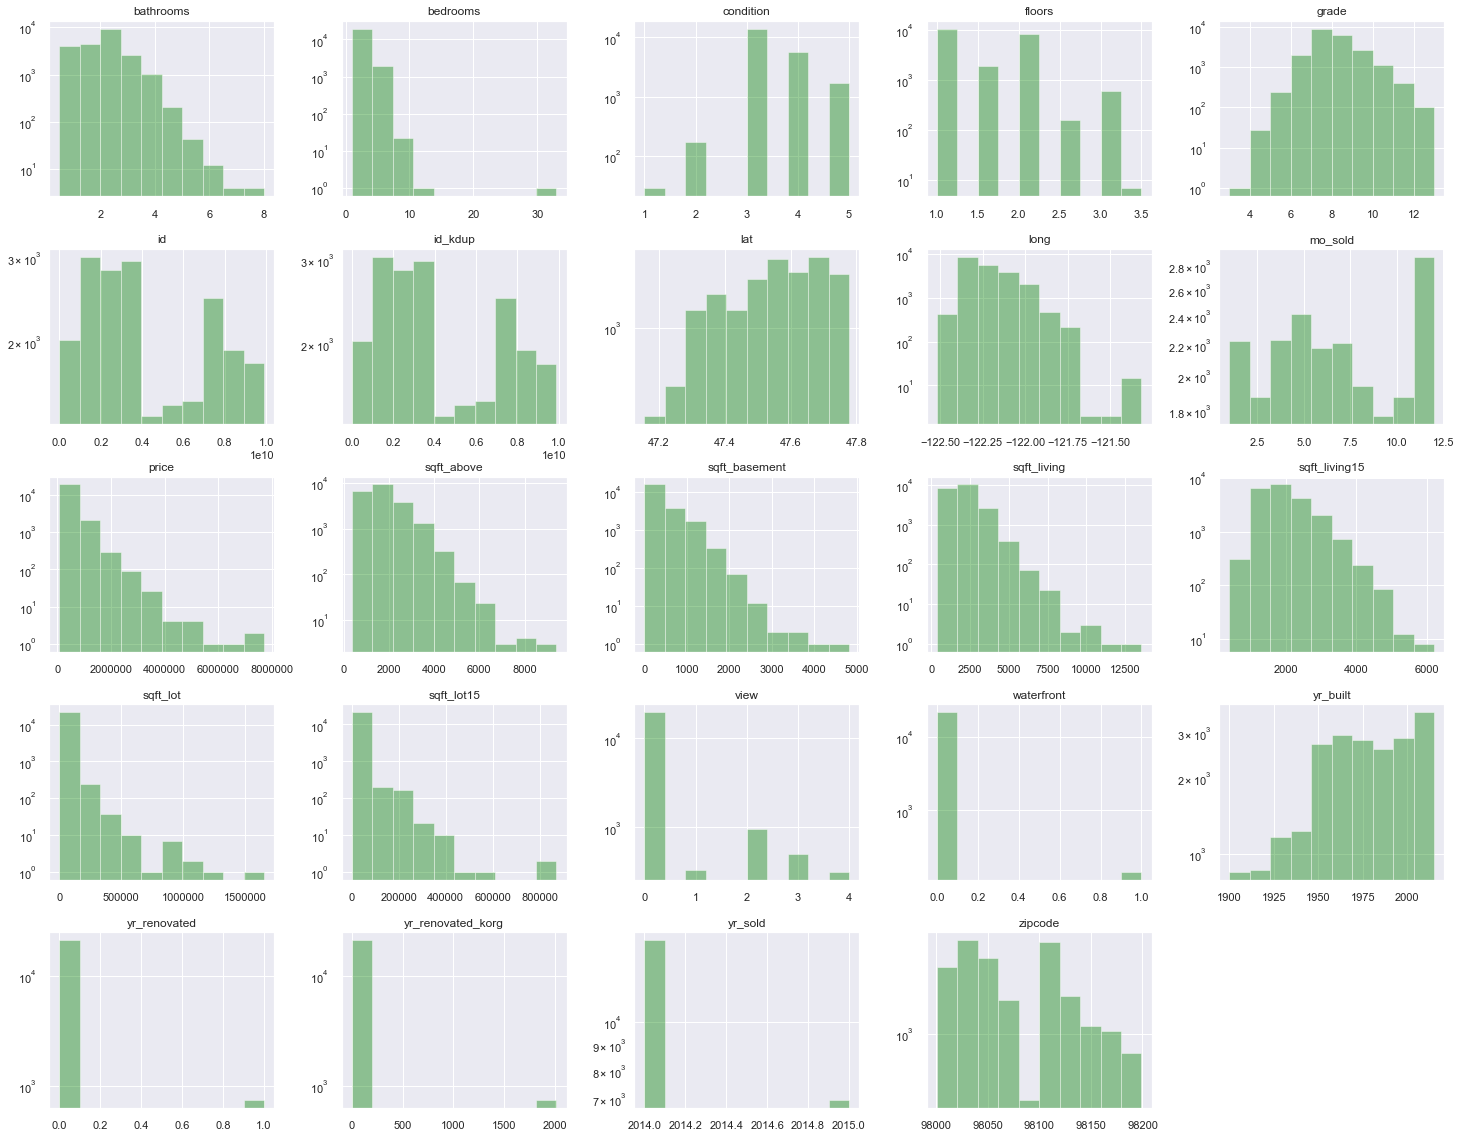

In [25]:
kc10.hist(figsize=(25,20), color='green', alpha=0.4, log=True)
plt.show()

##  inspect features

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots for the nearest 15 neighbors

### continuous features

In [26]:
selcols = list(col for col in kc10.columns if (col != 'id') & (col != 'id_kdup'))
kc11 = kc10.loc[:, selcols]
kc12_cont = kc11.loc[:, (kc11.dtypes != 'object') & (kc11.nunique() > 30)]
print(kc12_cont.shape)
kc12_cont.head()

(21597, 12)


price  sqft_living  sqft_lot  sqft_above  sqft_basement  yr_built  \
0  221900.0         1180      5650        1180            0.0      1955   
1  538000.0         2570      7242        2170          400.0      1951   
2  180000.0          770     10000         770            0.0      1933   
3  604000.0         1960      5000        1050          910.0      1965   
4  510000.0         1680      8080        1680            0.0      1987   

   zipcode      lat     long  sqft_living15  sqft_lot15  yr_renovated_korg  
0    98178  47.5112 -122.257           1340        5650                0.0  
1    98125  47.7210 -122.319           1690        7639             1991.0  
2    98028  47.7379 -122.233           2720        8062                0.0  
3    98136  47.5208 -122.393           1360        5000                0.0  
4    98074  47.6168 -122.045           1800        7503                0.0

price
sqft_living
sqft_lot
sqft_above
sqft_basement
yr_built
zipcode
lat
long
sqft_living15
sqft_lot15
yr_renovated_korg


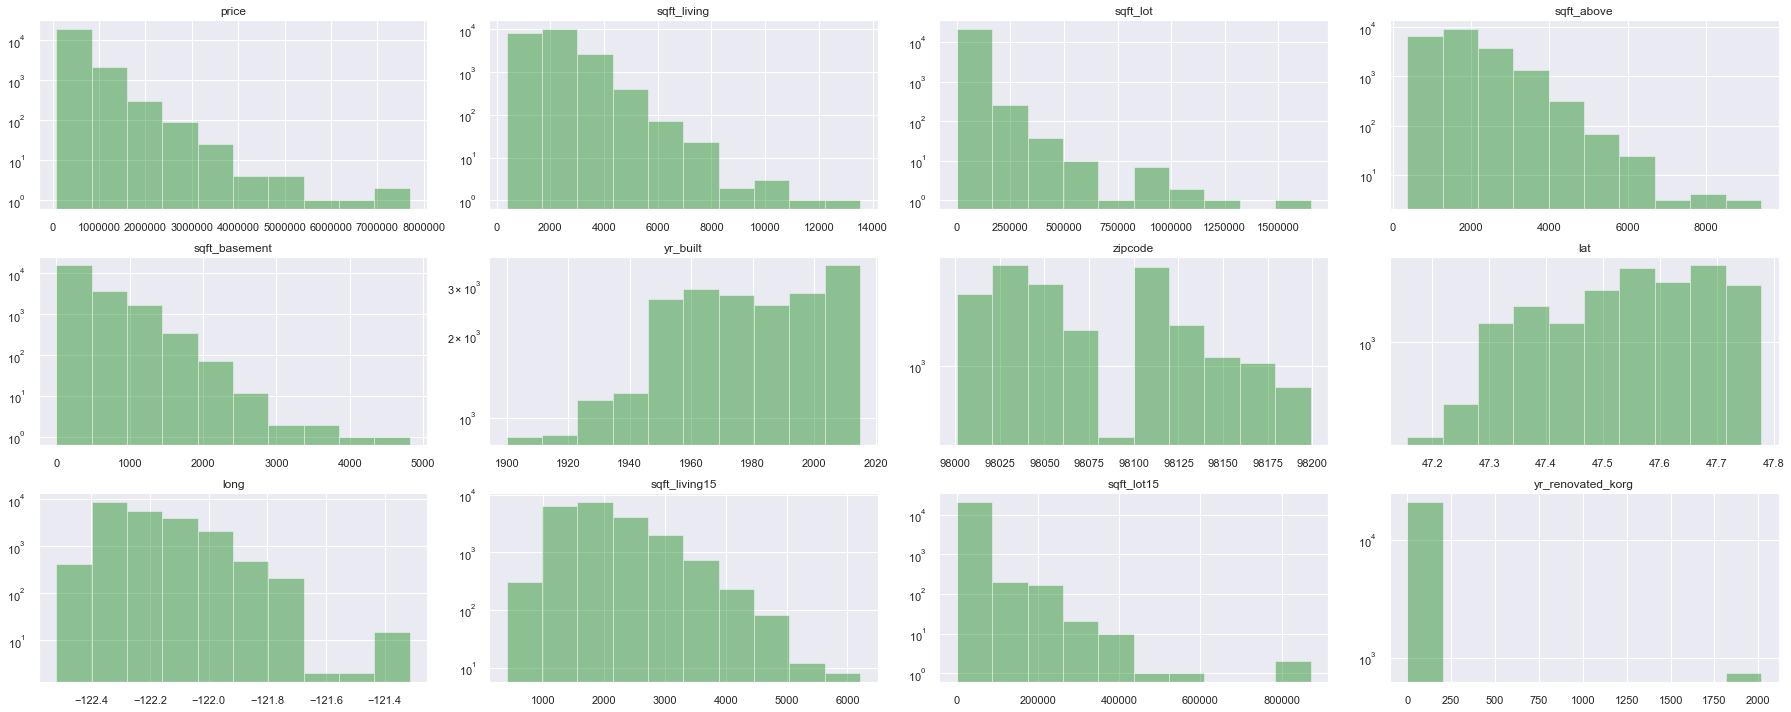

In [28]:
fig, axes = plt.subplots(nrows=kc12_cont.shape[1] // 4, ncols=4, figsize=(25,10))
continuous = list(col for col in kc12_cont.columns)
for xcol, ax in zip(continuous, axes.flatten()):
    print(xcol)
    ax.hist(kc12_cont[xcol], alpha=0.4, color='green')
    ax.set_title(xcol)
    ax.set_yscale('log')
    
fig.tight_layout()

In [29]:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15',
             'yr_built','yr_renovated_korg','zipcode','lat','long']
kc13_cont = kc12_cont.loc[:,cont_cols]
kc13_cont.head()

price  sqft_living  sqft_lot  sqft_above  sqft_basement  sqft_living15  \
0  221900.0         1180      5650        1180            0.0           1340   
1  538000.0         2570      7242        2170          400.0           1690   
2  180000.0          770     10000         770            0.0           2720   
3  604000.0         1960      5000        1050          910.0           1360   
4  510000.0         1680      8080        1680            0.0           1800   

   sqft_lot15  yr_built  yr_renovated_korg  zipcode      lat     long  
0        5650      1955                0.0    98178  47.5112 -122.257  
1        7639      1951             1991.0    98125  47.7210 -122.319  
2        8062      1933                0.0    98028  47.7379 -122.233  
3        5000      1965                0.0    98136  47.5208 -122.393  
4        7503      1987                0.0    98074  47.6168 -122.045

### categoricals features

In [30]:
kc10.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_renovated_korg', 'id_kdup',
       'yr_sold', 'mo_sold'],
      dtype='object')

In [31]:
cate_cols = ['price','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','mo_sold']
kc11_cate = kc10.loc[:, cate_cols]
print(kc11_cate.shape)
kc11_cate.head()

(21597, 10)


price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  221900.0         3       1.00     1.0         0.0   0.0          3      7   
1  538000.0         3       2.25     2.0         0.0   0.0          3      7   
2  180000.0         2       1.00     1.0         0.0   0.0          3      6   
3  604000.0         4       3.00     1.0         0.0   0.0          5      7   
4  510000.0         3       2.00     1.0         0.0   0.0          3      8   

   yr_renovated  mo_sold  
0           0.0       10  
1           1.0       12  
2           0.0        2  
3           0.0       12  
4           0.0        2

price
bedrooms
bathrooms
floors
waterfront
view
condition
grade
yr_renovated


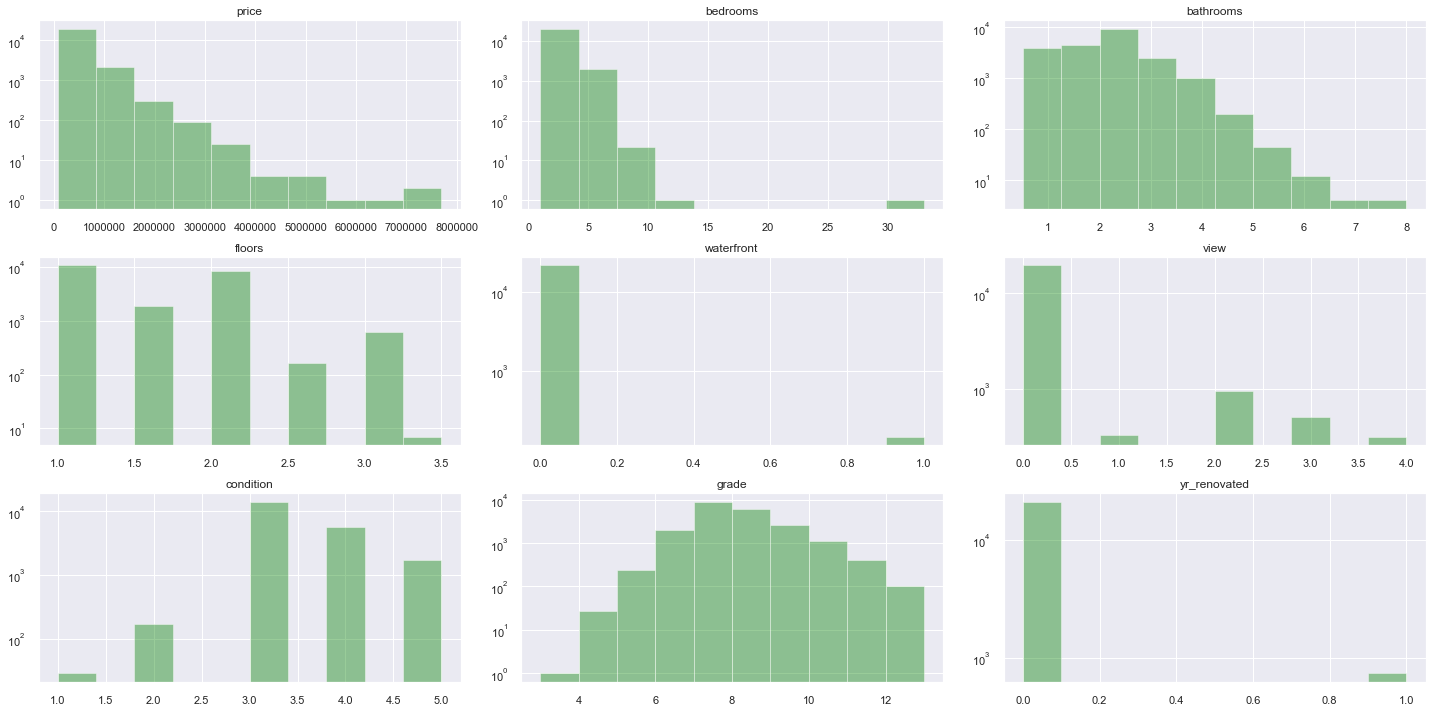

In [32]:
fig2, axes = plt.subplots(nrows=kc11_cate.shape[1] // 3, ncols=3, figsize=(20,10))
categorical = list(col for col in kc11_cate.columns)
for xcol, ax in zip(categorical, axes.flatten()):
    print(xcol)
    ax.hist(kc11_cate[xcol], alpha=0.4, color='green')
    ax.set_title(xcol)
    ax.set_yscale('log')
    
fig2.tight_layout()

## check linearity
### continuous features

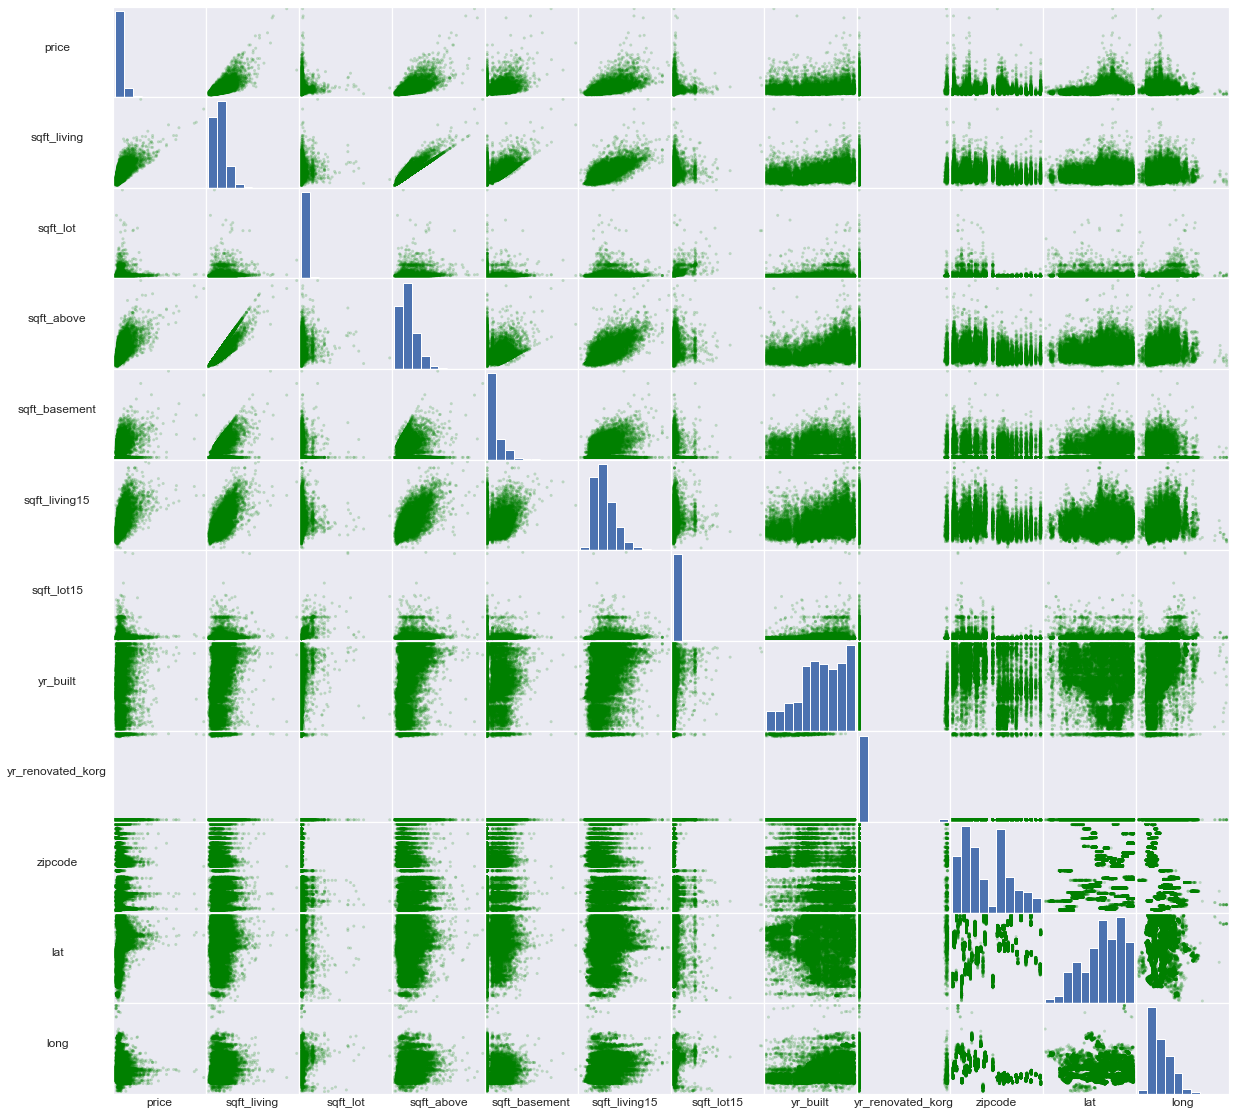

In [33]:
# Your code here 
sm = pd.plotting.scatter_matrix(kc13_cont, color='green', alpha=0.2, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [34]:
kc13_cont.corr()

price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
price              1.000000     0.701917  0.089876    0.605368       0.322192   
sqft_living        0.701917     1.000000  0.173453    0.876448       0.430190   
sqft_lot           0.089876     0.173453  1.000000    0.184139       0.015293   
sqft_above         0.605368     0.876448  0.184139    1.000000      -0.051781   
sqft_basement      0.322192     0.430190  0.015293   -0.051781       1.000000   
sqft_living15      0.585241     0.756402  0.144763    0.731767       0.199577   
sqft_lot15         0.082845     0.184342  0.718204    0.195077       0.016420   
yr_built           0.053953     0.318152  0.052946    0.424037      -0.131202   
yr_renovated_korg  0.117855     0.051060  0.004979    0.020645       0.066204   
zipcode           -0.053402    -0.199802 -0.129586   -0.261570       0.074616   
lat                0.306692     0.052155 -0.085514   -0.001199       0.109500   
long               0.022036     0.241214  0.230227    0.344842      -0.143511   

                   sqft_living15  sqft_lot15  yr_built  yr_renovated_korg  \
price                   0.585241    0.082845  0.053953           0.117855   
sqft_living             0.756402    0.184342  0.318152           0.051060   
sqft_lot                0.144763    0.718204  0.052946           0.004979   
sqft_above              0.731767    0.195077  0.424037           0.020645   
sqft_basement           0.199577    0.016420 -0.131202           0.066204   
sqft_living15           1.000000    0.183515  0.326377           0.000683   
sqft_lot15              0.183515    1.000000  0.070777           0.004286   
yr_built                0.326377    0.070777  1.000000          -0.202555   
yr_renovated_korg       0.000683    0.004286 -0.202555           1.000000   
zipcode                -0.279299   -0.147294 -0.347210           0.062397   
lat                     0.048679   -0.086139 -0.148370           0.027970   
long                    0.335626    0.255586  0.409993          -0.064543   

                    zipcode       lat      long  
price             -0.053402  0.306692  0.022036  
sqft_living       -0.199802  0.052155  0.241214  
sqft_lot          -0.129586 -0.085514  0.230227  
sqft_above        -0.261570 -0.001199  0.344842  
sqft_basement      0.074616  0.109500 -0.143511  
sqft_living15     -0.279299  0.048679  0.335626  
sqft_lot15        -0.147294 -0.086139  0.255586  
yr_built          -0.347210 -0.148370  0.409993  
yr_renovated_korg  0.062397  0.027970 -0.064543  
zipcode            1.000000  0.266742 -0.564259  
lat                0.266742  1.000000 -0.135371  
long              -0.564259 -0.135371  1.000000

In [35]:
cc1_df = kc13_cont.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc1_df.head())
cc1_df['pairs'] = list(zip(cc1_df.level_0, cc1_df.level_1))
cc1pairs_df = cc1_df.set_index('pairs')
cc1pairs_df = cc1pairs_df.drop(['level_1', 'level_0'], axis=1)
cc1pairs_df.columns = ['cc']
cc1pairs_df = cc1pairs_df.drop_duplicates(keep='first')
cc1pairs_df.head()

               level_0            level_1         0
68       sqft_living15  yr_renovated_korg  0.000683
101  yr_renovated_korg      sqft_living15  0.000683
46          sqft_above                lat  0.001199
123                lat         sqft_above  0.001199
80          sqft_lot15  yr_renovated_korg  0.004286


cc
pairs                                       
(sqft_living15, yr_renovated_korg)  0.000683
(sqft_above, lat)                   0.001199
(sqft_lot15, yr_renovated_korg)     0.004286
(yr_renovated_korg, sqft_lot)       0.004979
(sqft_lot, sqft_basement)           0.015293

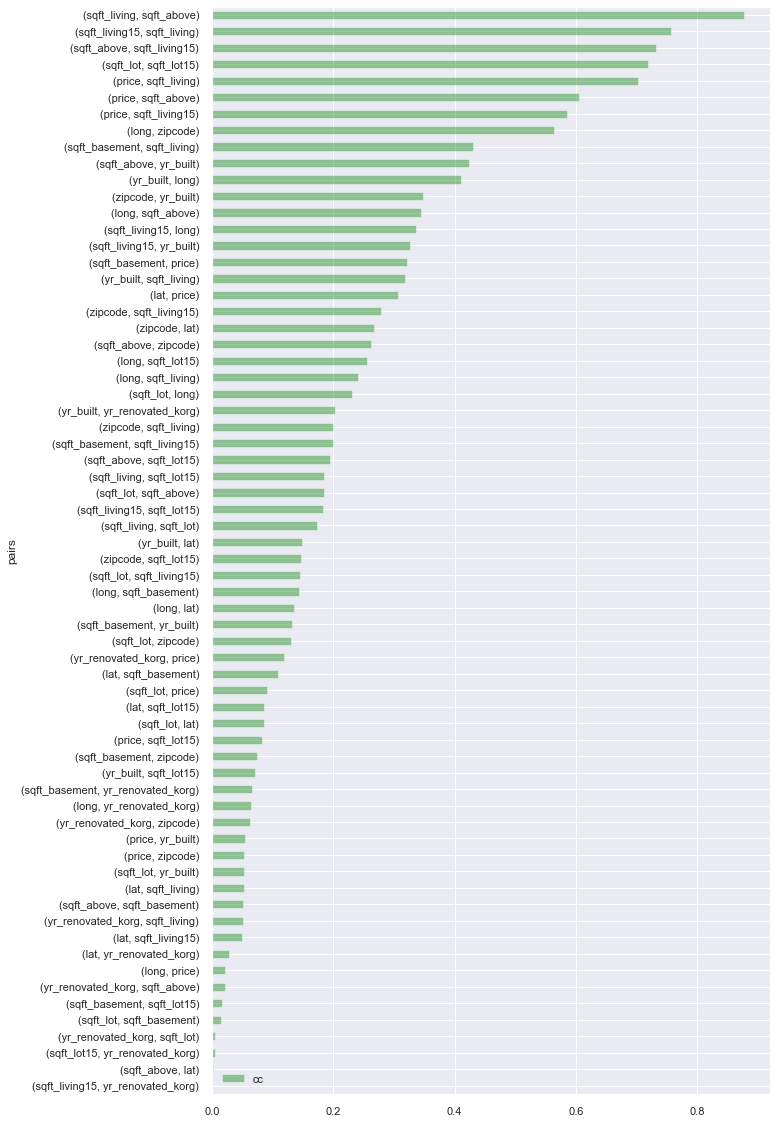

In [36]:
cc1pairs_update_df = cc1pairs_df[cc1pairs_df.cc<1]
cc1pairs_update_df.plot.barh(figsize=(10,20), color='green', alpha=0.4)

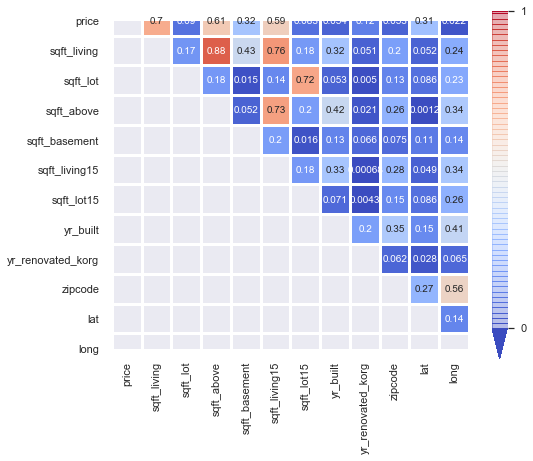

In [37]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc13_cont.corr().abs(), mask=np.tril(kc13_cont.corr().abs()), cmap='coolwarm', center=0.5, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

In [38]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(r"$\rho$ = " + str(round(r, 2)), xy=(.1, 1.), size=15, xycoords=ax.transAxes)
    ax.annotate(f"p = {p:.3f}", xy=(.6, 1.), size=15, xycoords=ax.transAxes)

In [39]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (.2, .95), size=20, xycoords = ax.transAxes)

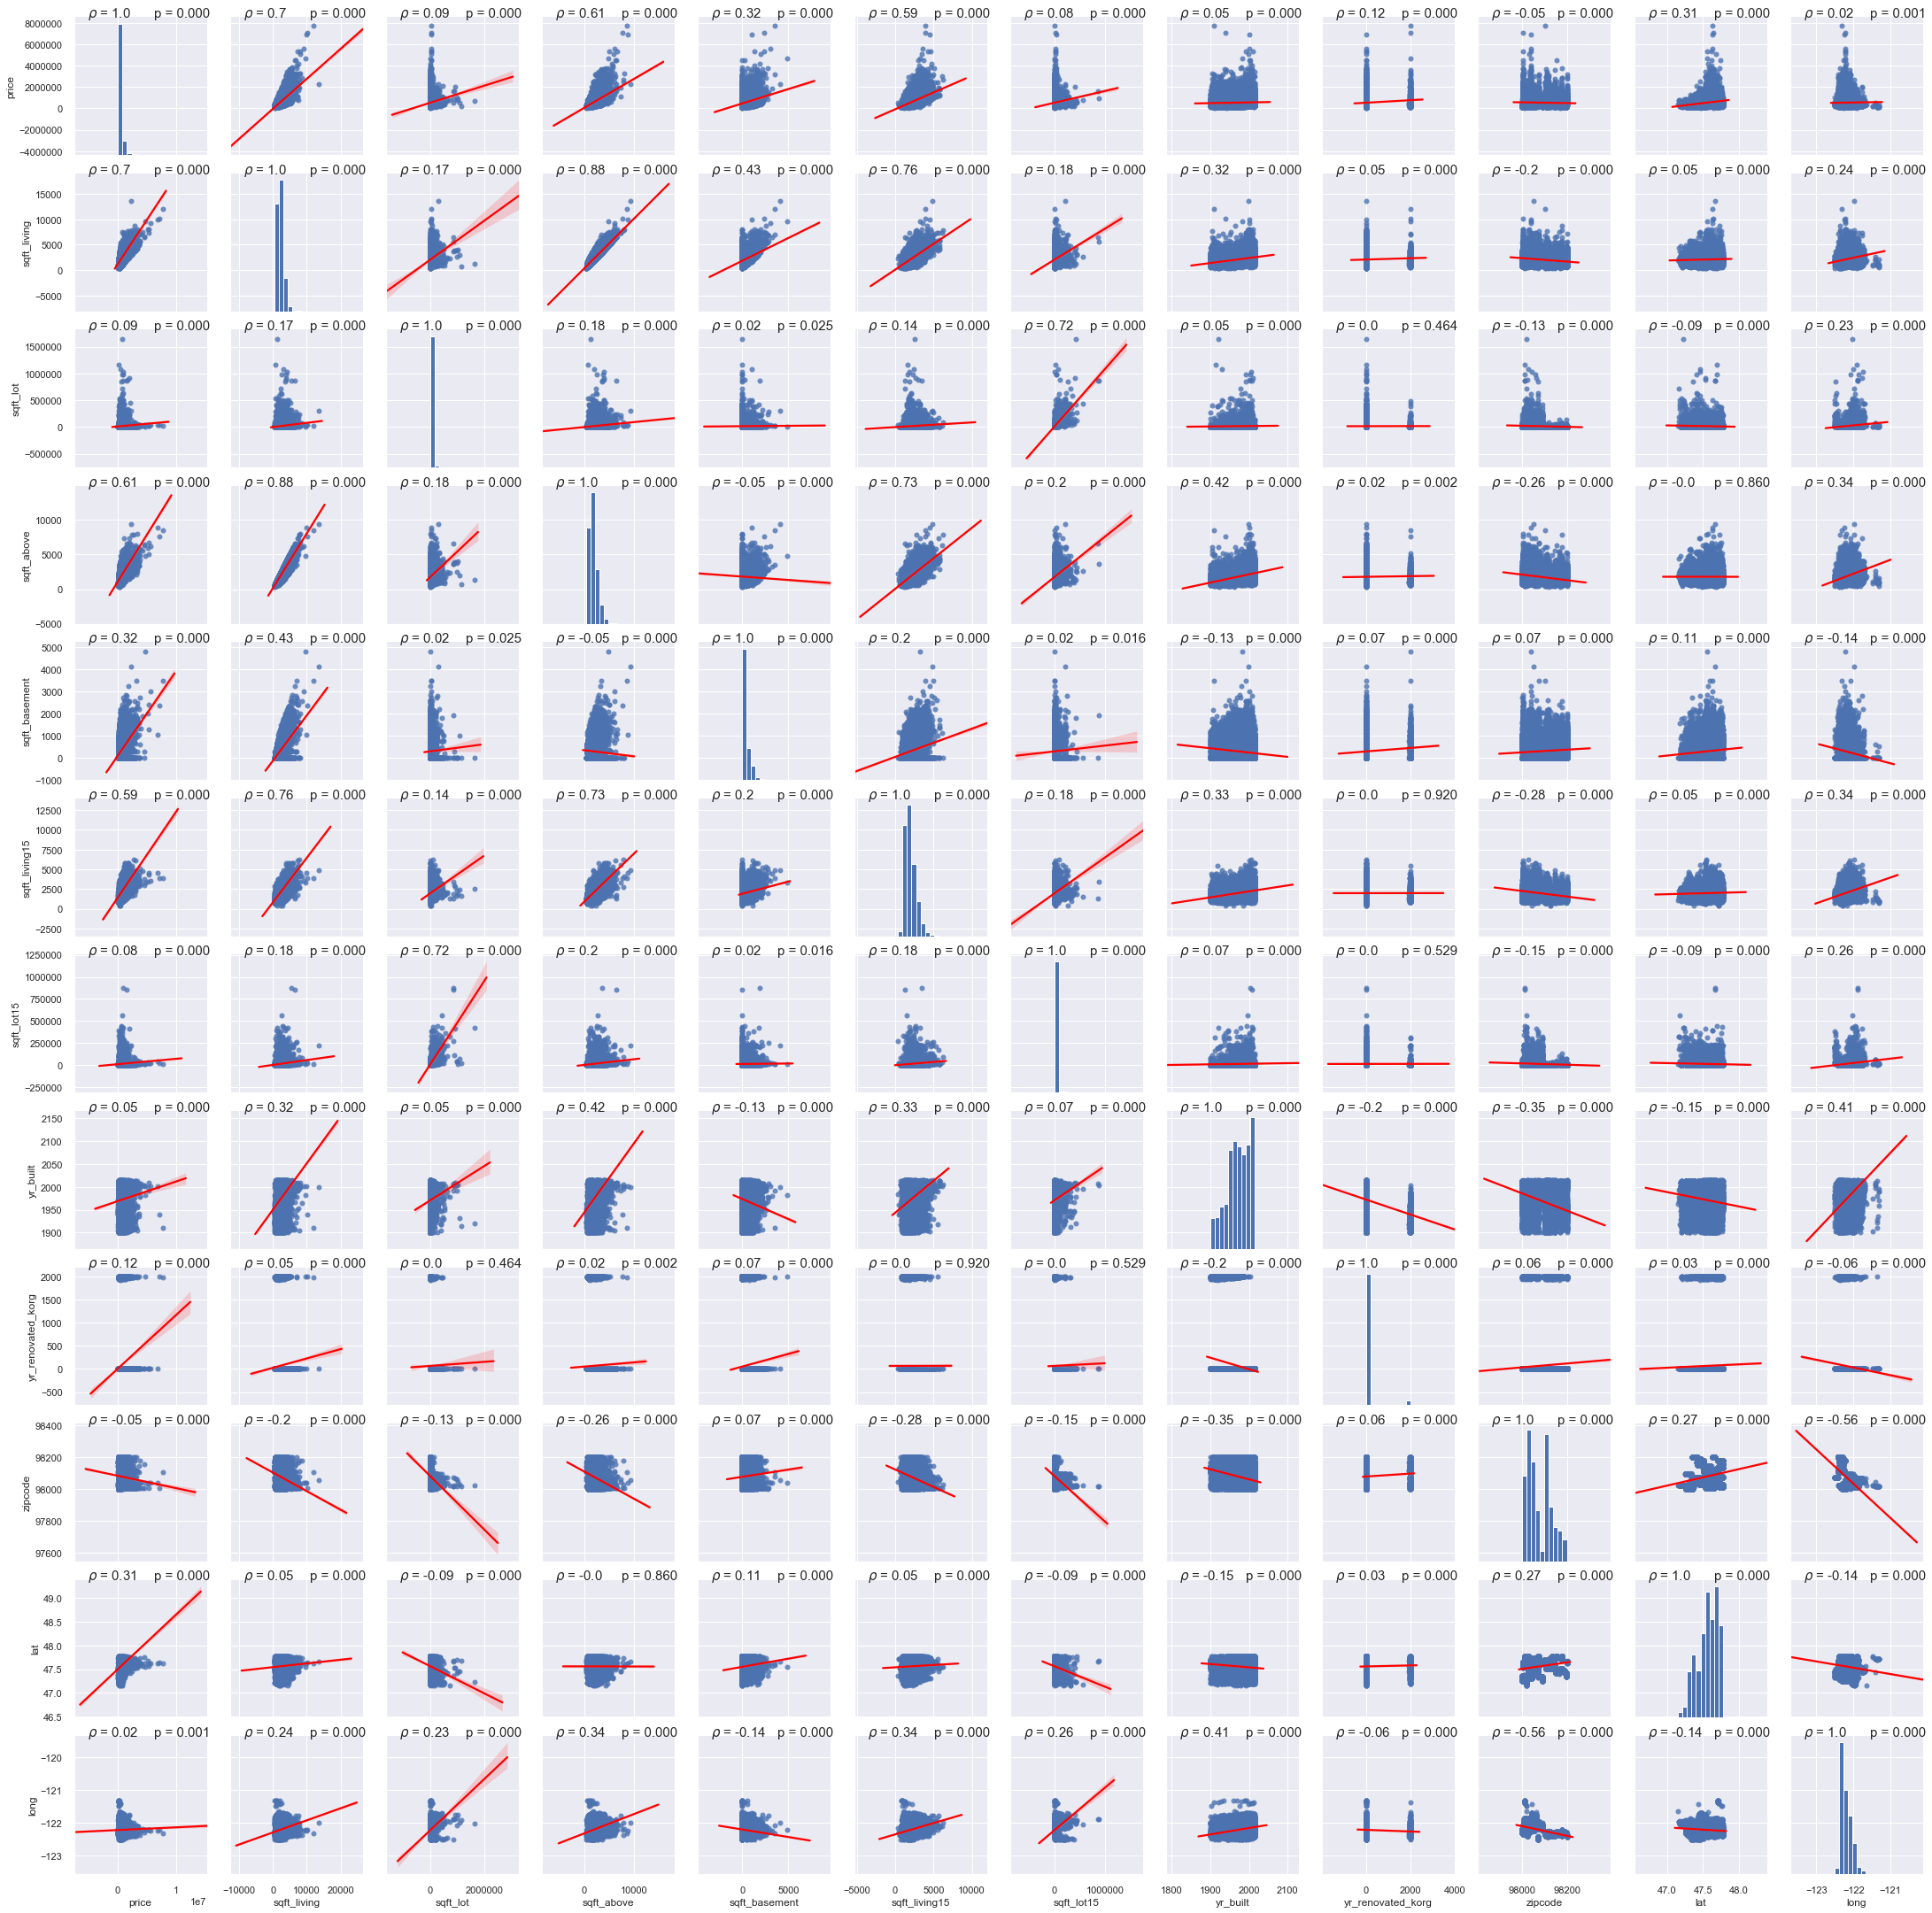

In [40]:
#cont_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15',
#             'yr_built','zipcode']
#cont_feats = ['price','sqft_living','sqft_lot','yr_built','zipcode']
cont_feats = list(kc13_cont.columns)
g = sns.pairplot(kc13_cont, vars = cont_feats, kind='reg', plot_kws={'line_kws':{'color':'red'}})
g.map(corrfunc)
plt.show()

### categorical features

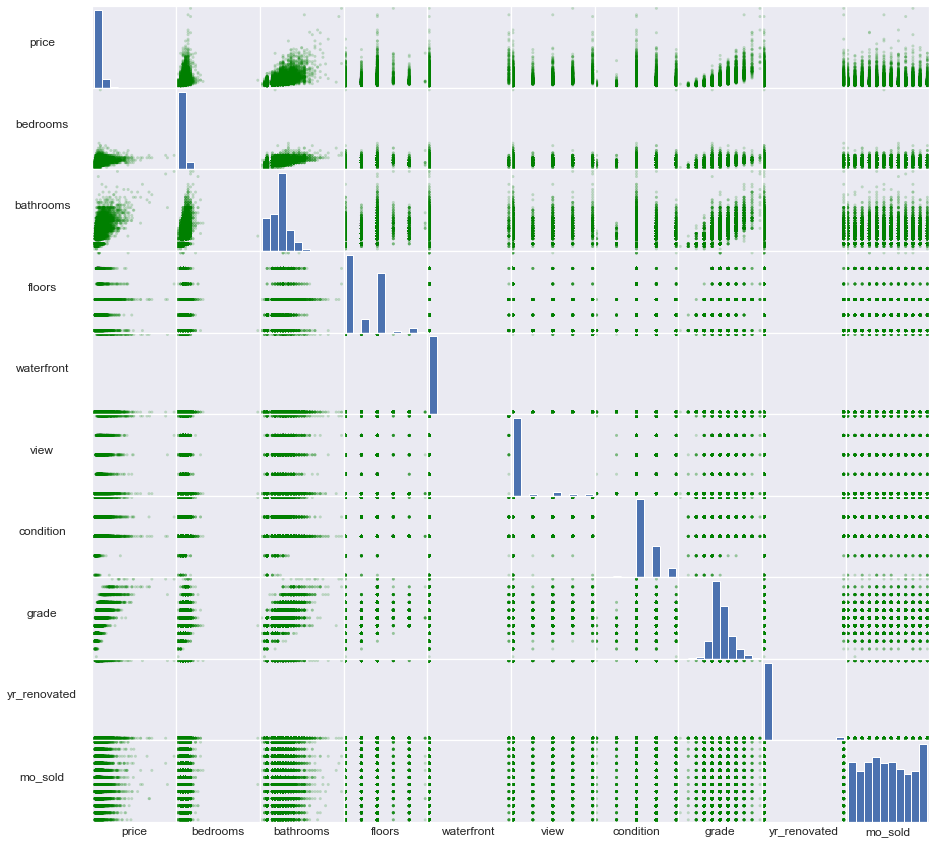

In [41]:
sm = pd.plotting.scatter_matrix(kc11_cate, color='green', alpha=0.2, figsize=[15, 15]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [42]:
kc11_cate.corr()

price  bedrooms  bathrooms    floors  waterfront      view  \
price         1.000000  0.308787   0.525906  0.256804    0.264306  0.393497   
bedrooms      0.308787  1.000000   0.514508  0.177944   -0.002127  0.078354   
bathrooms     0.525906  0.514508   1.000000  0.502582    0.063629  0.186016   
floors        0.256804  0.177944   0.502582  1.000000    0.020797  0.028414   
waterfront    0.264306 -0.002127   0.063629  0.020797    1.000000  0.380543   
view          0.393497  0.078354   0.186016  0.028414    0.380543  1.000000   
condition     0.036056  0.026496  -0.126479 -0.264075    0.016648  0.045622   
grade         0.667951  0.356563   0.665838  0.458794    0.082818  0.249082   
yr_renovated  0.117543  0.017635   0.046742  0.003713    0.074267  0.090480   
mo_sold      -0.009928 -0.001046   0.007543  0.014245    0.008199 -0.005161   

              condition     grade  yr_renovated   mo_sold  
price          0.036056  0.667951      0.117543 -0.009928  
bedrooms       0.026496  0.356563      0.017635 -0.001046  
bathrooms     -0.126479  0.665838      0.046742  0.007543  
floors        -0.264075  0.458794      0.003713  0.014245  
waterfront     0.016648  0.082818      0.074267  0.008199  
view           0.045622  0.249082      0.090480 -0.005161  
condition      1.000000 -0.146896     -0.055383  0.022388  
grade         -0.146896  1.000000      0.015259  0.008989  
yr_renovated  -0.055383  0.015259      1.000000  0.007659  
mo_sold        0.022388  0.008989      0.007659  1.000000

In [43]:
cc2_df = kc11_cate.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc2_df.head())
cc2_df['pairs'] = list(zip(cc2_df.level_0, cc2_df.level_1))
cc2pairs_df = cc2_df.set_index('pairs')
cc2pairs_df = cc2pairs_df.drop(['level_1', 'level_0'], axis=1)
cc2pairs_df.columns = ['cc']
cc2pairs_df = cc2pairs_df.drop_duplicates(keep='first')
cc2pairs_df.head()

         level_0     level_1         0
91       mo_sold    bedrooms  0.001046
19      bedrooms     mo_sold  0.001046
41    waterfront    bedrooms  0.002127
14      bedrooms  waterfront  0.002127
83  yr_renovated      floors  0.003713


cc
pairs                           
(mo_sold, bedrooms)     0.001046
(waterfront, bedrooms)  0.002127
(yr_renovated, floors)  0.003713
(view, mo_sold)         0.005161
(mo_sold, bathrooms)    0.007543

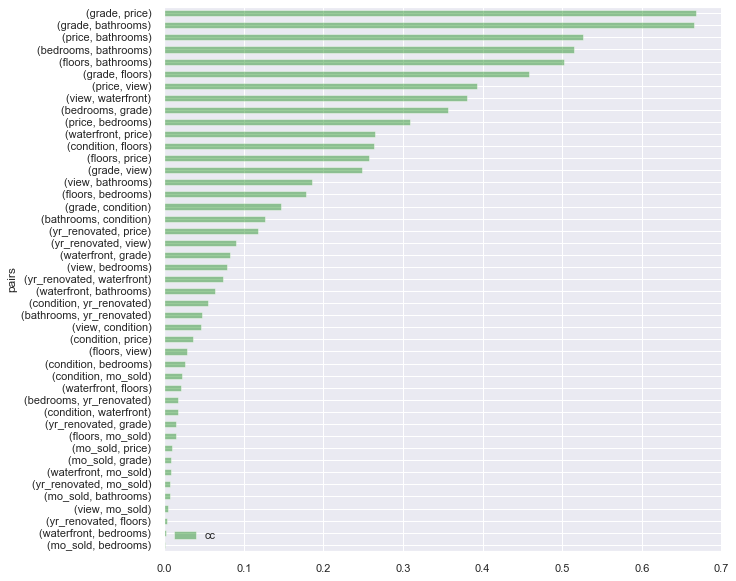

In [44]:
cc2pairs_update_df = cc2pairs_df[cc2pairs_df.cc<1]
cc2pairs_update_df.plot.barh(figsize=(10,10), color='green', alpha=0.4)

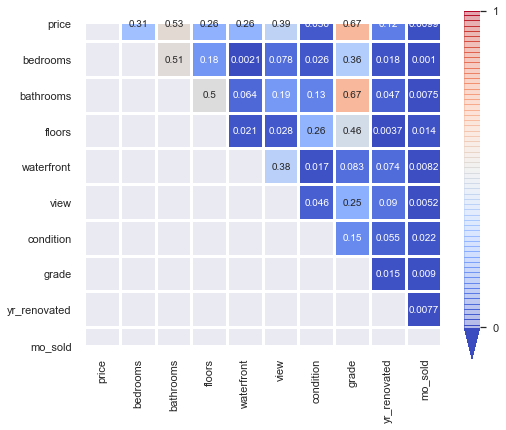

In [45]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc11_cate.corr().abs(), mask=np.tril(kc11_cate.corr().abs()), cmap='coolwarm', center=0.5, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

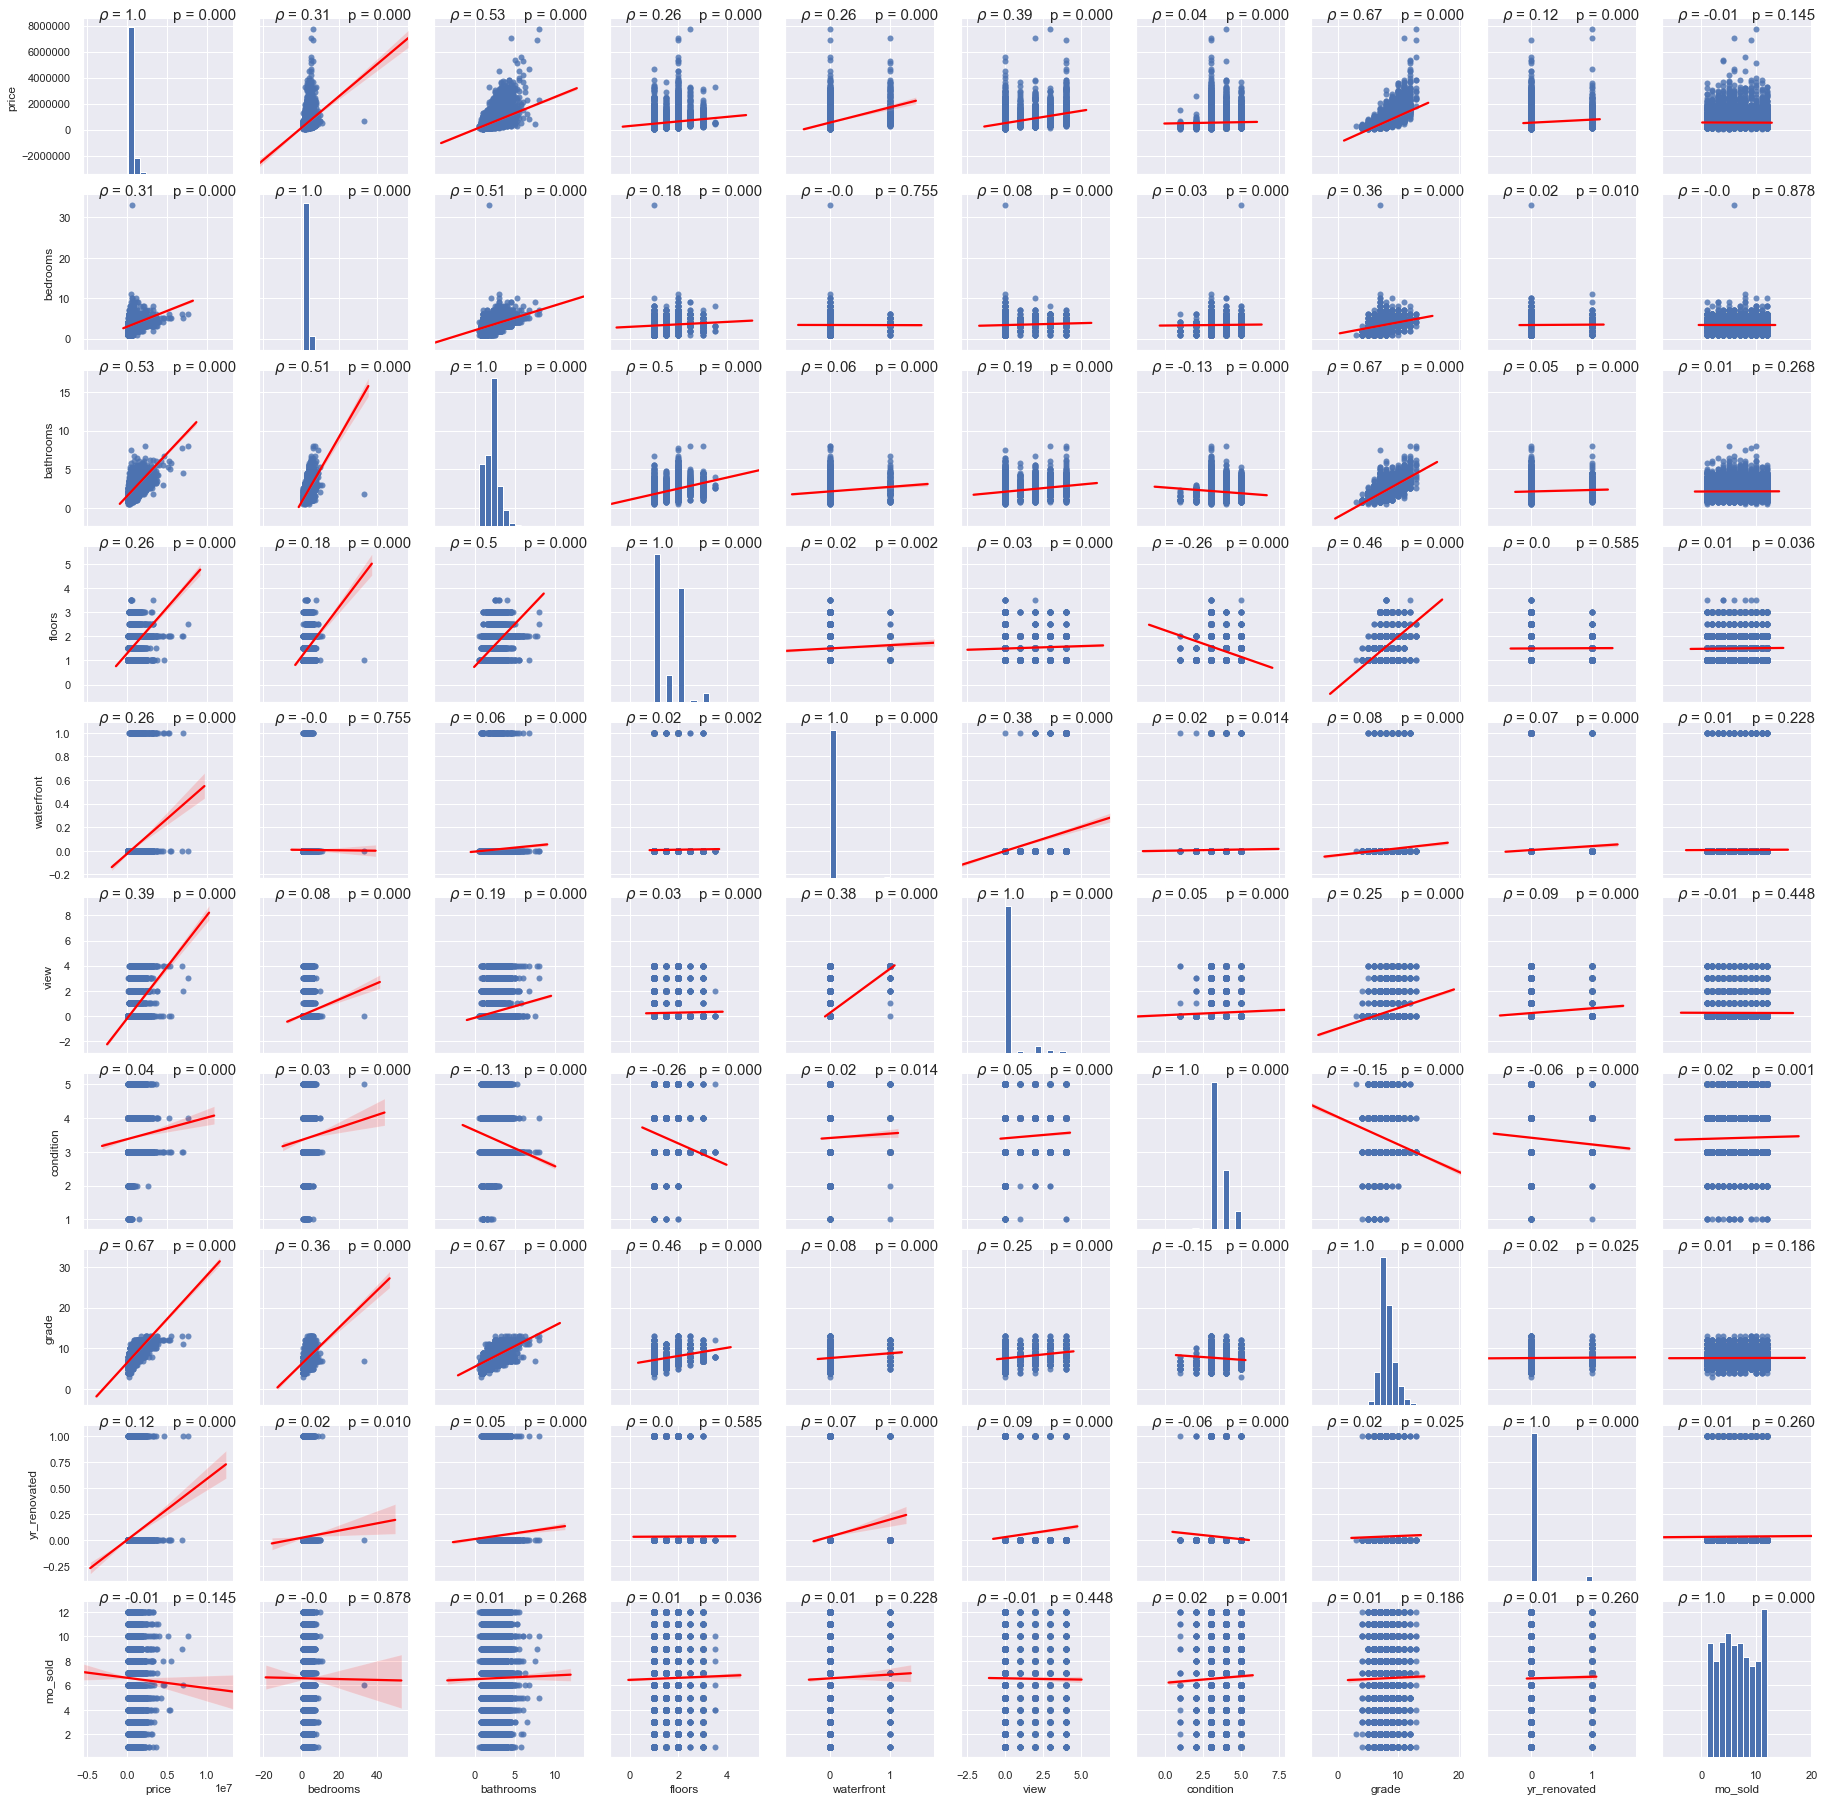

In [46]:
#cate_feats = ['price','bathrooms','view','grade']
cate_feats = list(kc11_cate.columns)
g = sns.pairplot(kc11_cate, vars = cate_feats, kind='reg', plot_kws={'line_kws':{'color':'red'}})
g.map(corrfunc)
plt.show()

## all features

In [47]:
all_feats = cate_feats + cont_feats
kc11_all = kc10.loc[:, all_feats]
kc11_all = kc11_all.loc[:,~kc11_all.columns.duplicated()]
print(kc11_all.shape)
kc11_all.head()

(21597, 21)


price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  221900.0         3       1.00     1.0         0.0   0.0          3      7   
1  538000.0         3       2.25     2.0         0.0   0.0          3      7   
2  180000.0         2       1.00     1.0         0.0   0.0          3      6   
3  604000.0         4       3.00     1.0         0.0   0.0          5      7   
4  510000.0         3       2.00     1.0         0.0   0.0          3      8   

   yr_renovated  mo_sold  ...  sqft_lot  sqft_above  sqft_basement  \
0           0.0       10  ...      5650        1180            0.0   
1           1.0       12  ...      7242        2170          400.0   
2           0.0        2  ...     10000         770            0.0   
3           0.0       12  ...      5000        1050          910.0   
4           0.0        2  ...      8080        1680            0.0   

   sqft_living15  sqft_lot15  yr_built  yr_renovated_korg  zipcode      lat  \
0           1340        5650      1955                0.0    98178  47.5112   
1           1690        7639      1951             1991.0    98125  47.7210   
2           2720        8062      1933                0.0    98028  47.7379   
3           1360        5000      1965                0.0    98136  47.5208   
4           1800        7503      1987                0.0    98074  47.6168   

      long  
0 -122.257  
1 -122.319  
2 -122.233  
3 -122.393  
4 -122.045  

[5 rows x 21 columns]

In [48]:
kc11_all.corr()

price  bedrooms  bathrooms    floors  waterfront  \
price              1.000000  0.308787   0.525906  0.256804    0.264306   
bedrooms           0.308787  1.000000   0.514508  0.177944   -0.002127   
bathrooms          0.525906  0.514508   1.000000  0.502582    0.063629   
floors             0.256804  0.177944   0.502582  1.000000    0.020797   
waterfront         0.264306 -0.002127   0.063629  0.020797    1.000000   
view               0.393497  0.078354   0.186016  0.028414    0.380543   
condition          0.036056  0.026496  -0.126479 -0.264075    0.016648   
grade              0.667951  0.356563   0.665838  0.458794    0.082818   
yr_renovated       0.117543  0.017635   0.046742  0.003713    0.074267   
mo_sold           -0.009928 -0.001046   0.007543  0.014245    0.008199   
sqft_living        0.701917  0.578212   0.755758  0.353953    0.104637   
sqft_lot           0.089876  0.032471   0.088373 -0.004814    0.021459   
sqft_above         0.605368  0.479386   0.686668  0.523989    0.071778   
sqft_basement      0.322192  0.299037   0.279541 -0.242359    0.083779   
sqft_living15      0.585241  0.393406   0.569884  0.280102    0.083823   
sqft_lot15         0.082845  0.030690   0.088303 -0.010722    0.030658   
yr_built           0.053953  0.155670   0.507173  0.489193   -0.024487   
yr_renovated_korg  0.117855  0.017900   0.047177  0.003793    0.073939   
zipcode           -0.053402 -0.154092  -0.204786 -0.059541    0.028923   
lat                0.306692 -0.009951   0.024280  0.049239   -0.012157   
long               0.022036  0.132054   0.224903  0.125943   -0.037628   

                       view  condition     grade  yr_renovated   mo_sold  ...  \
price              0.393497   0.036056  0.667951      0.117543 -0.009928  ...   
bedrooms           0.078354   0.026496  0.356563      0.017635 -0.001046  ...   
bathrooms          0.186016  -0.126479  0.665838      0.046742  0.007543  ...   
floors             0.028414  -0.264075  0.458794      0.003713  0.014245  ...   
waterfront         0.380543   0.016648  0.082818      0.074267  0.008199  ...   
view               1.000000   0.045622  0.249082      0.090480 -0.005161  ...   
condition          0.045622   1.000000 -0.146896     -0.055383  0.022388  ...   
grade              0.249082  -0.146896  1.000000      0.015259  0.008989  ...   
yr_renovated       0.090480  -0.055383  0.015259      1.000000  0.007659  ...   
mo_sold           -0.005161   0.022388  0.008989      0.007659  1.000000  ...   
sqft_living        0.281715  -0.059445  0.762779      0.050829  0.012112  ...   
sqft_lot           0.075054  -0.008830  0.114731      0.005091 -0.002591  ...   
sqft_above         0.166017  -0.158904  0.756073      0.020566  0.010153  ...   
sqft_basement      0.272313   0.169153  0.166397      0.065877  0.006978  ...   
sqft_living15      0.278928  -0.093072  0.713867      0.000622  0.002513  ...   
sqft_lot15         0.073083  -0.003126  0.120981      0.004380  0.003189  ...   
yr_built          -0.054452  -0.361592  0.447865     -0.202837 -0.006235  ...   
yr_renovated_korg  0.090339  -0.055808  0.015623      0.999968  0.007649  ...   
zipcode            0.085059   0.002888 -0.185771      0.062378 -0.000143  ...   
lat                0.006321  -0.015102  0.113575      0.027908  0.014995  ...   
long              -0.077702  -0.105877  0.200341     -0.064511 -0.008404  ...   

                   sqft_lot  sqft_above  sqft_basement  sqft_living15  \
price              0.089876    0.605368       0.322192       0.585241   
bedrooms           0.032471    0.479386       0.299037       0.393406   
bathrooms          0.088373    0.686668       0.279541       0.569884   
floors            -0.004814    0.523989      -0.242359       0.280102   
waterfront         0.021459    0.071778       0.083779       0.083823   
view               0.075054    0.166017       0.272313       0.278928   
condition         -0.008830   -0.158904       0.169153      -0.093072   
grade              0.11473

In [49]:
cc3_df = kc11_all.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc3_df.head())
cc3_df['pairs'] = list(zip(cc3_df.level_0, cc3_df.level_1))
cc3pairs_df = cc3_df.set_index('pairs')
cc3pairs_df = cc3pairs_df.drop(['level_1', 'level_0'], axis=1)
cc3pairs_df.columns = ['cc']
cc3pairs_df = cc3pairs_df.drop_duplicates(keep='first')
cc3pairs_df.head()

           level_0            level_1         0
387        zipcode            mo_sold  0.000143
207        mo_sold            zipcode  0.000143
302  sqft_living15       yr_renovated  0.000622
182   yr_renovated      sqft_living15  0.000622
311  sqft_living15  yr_renovated_korg  0.000683


cc
pairs                                       
(zipcode, mo_sold)                  0.000143
(sqft_living15, yr_renovated)       0.000622
(sqft_living15, yr_renovated_korg)  0.000683
(mo_sold, bedrooms)                 0.001046
(sqft_above, lat)                   0.001199

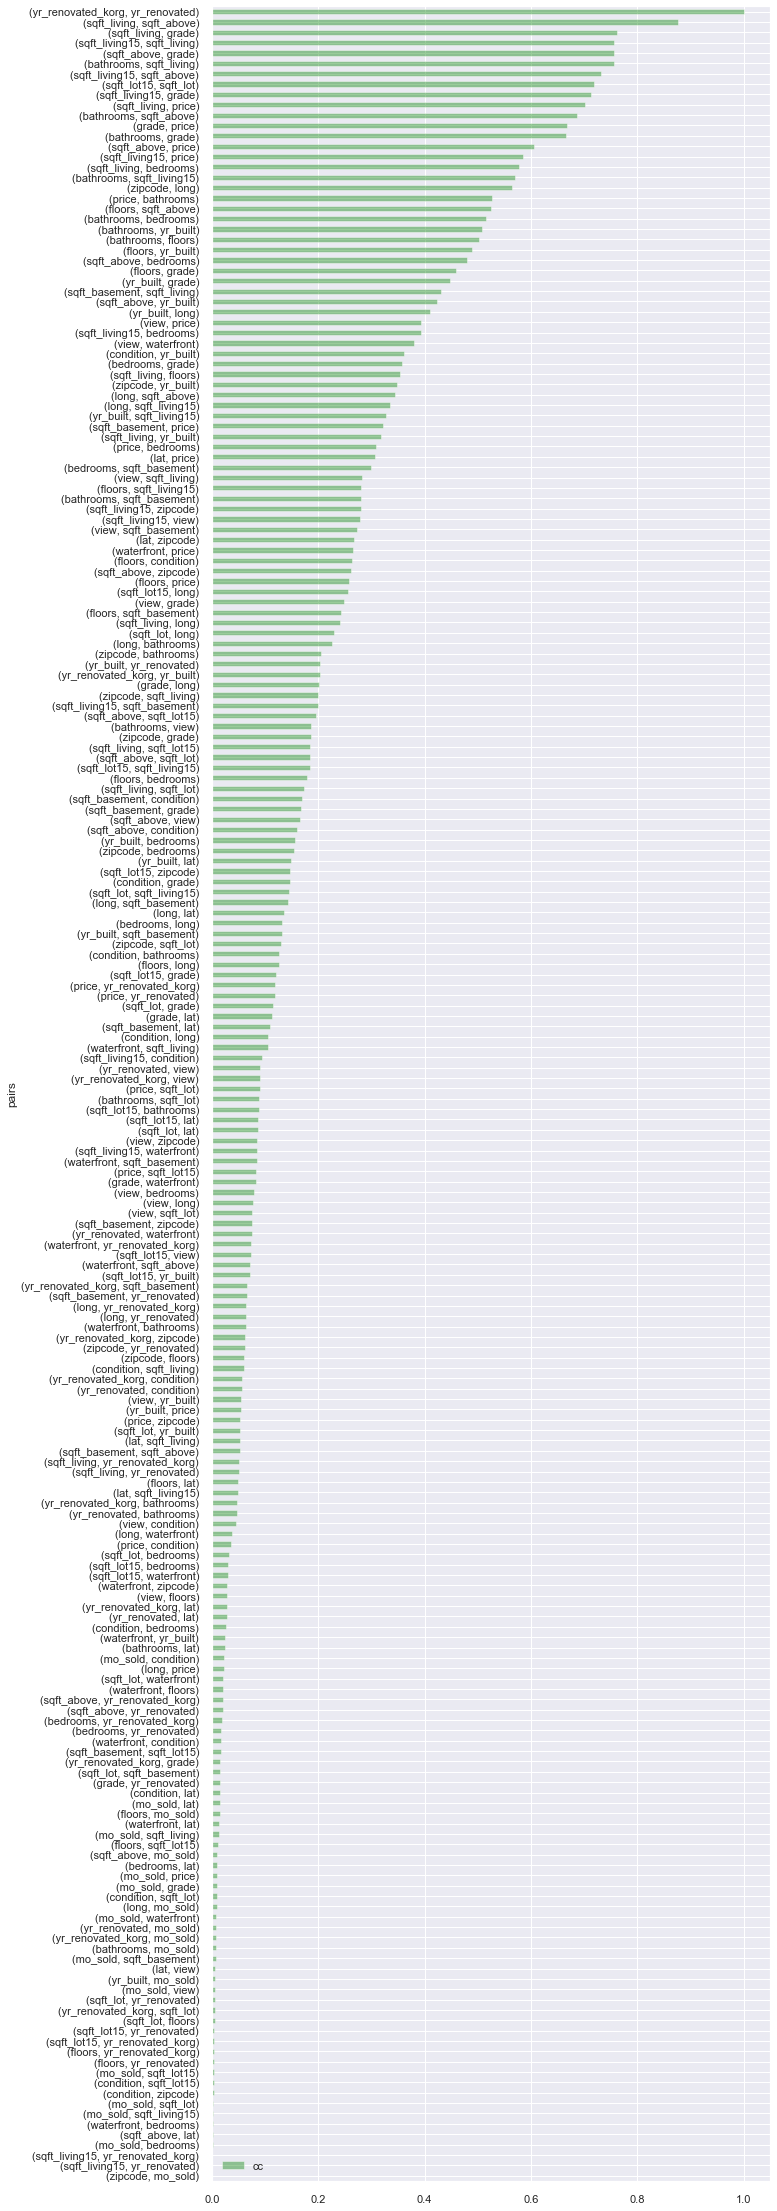

In [50]:
cc3pairs_update_df = cc3pairs_df[cc3pairs_df.cc<1]
cc3pairs_update_df.plot.barh(figsize=(10,40), color='green', alpha=0.4)

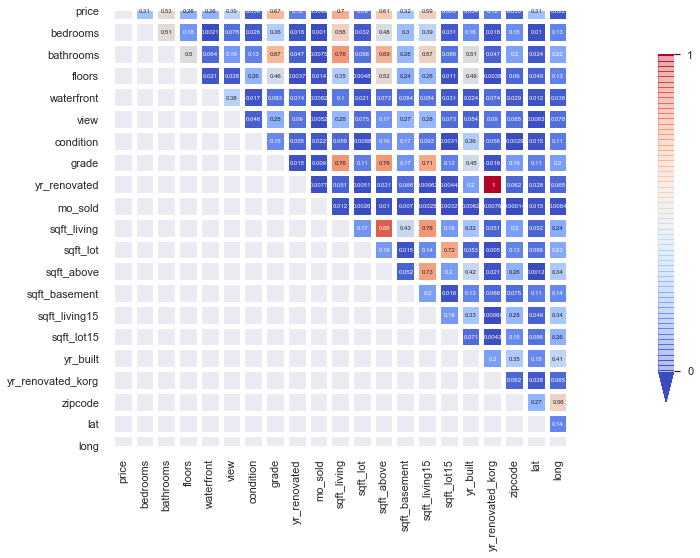

In [51]:
plt.figure(figsize=(32,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc11_all.corr().abs(), mask=np.tril(kc11_all.corr().abs()), cmap="coolwarm", center=0.5, linewidths=4, square= True, annot=True, annot_kws={"fontsize":6}, cbar_kws=cbar_kws)
plt.show()

## modeling data: build baseline model
### simple linear regression

King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~price
-------------------------------------------------------------------------------------


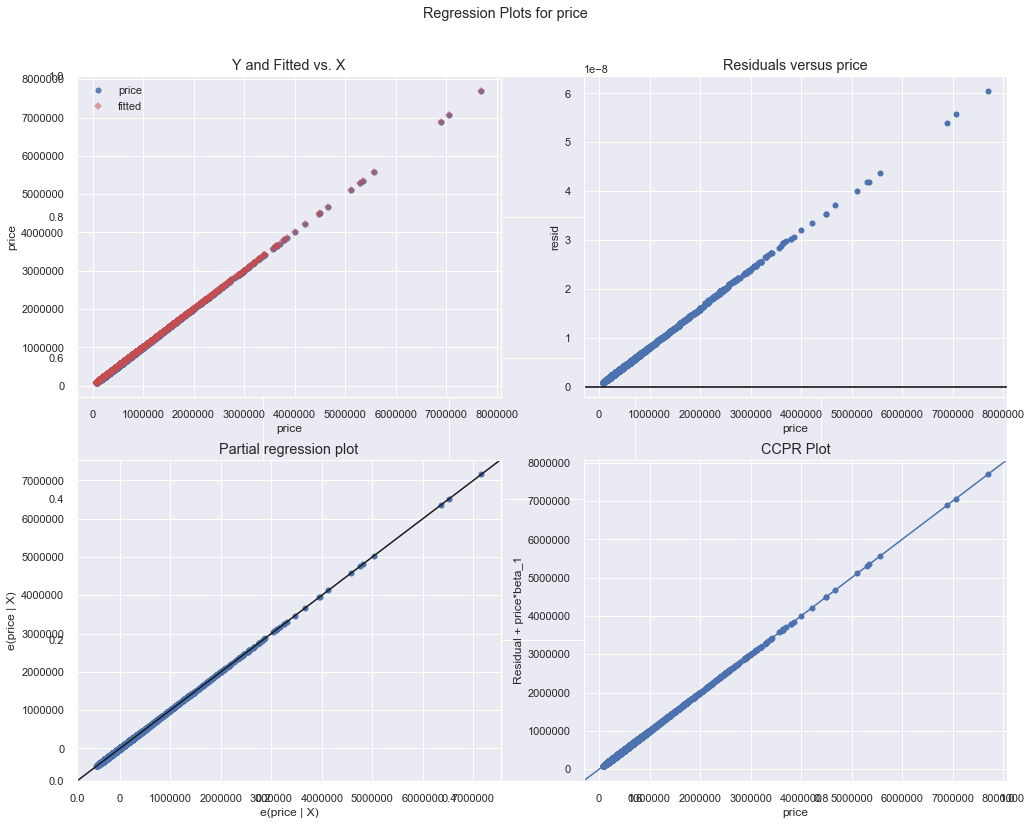

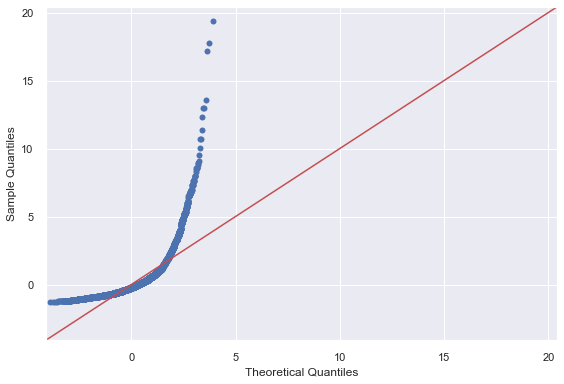

price: R2 1.000 , intercept -0.000 , slope 1.000 , p-value 0.000 , JB 1148479.220
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~bedrooms
-------------------------------------------------------------------------------------


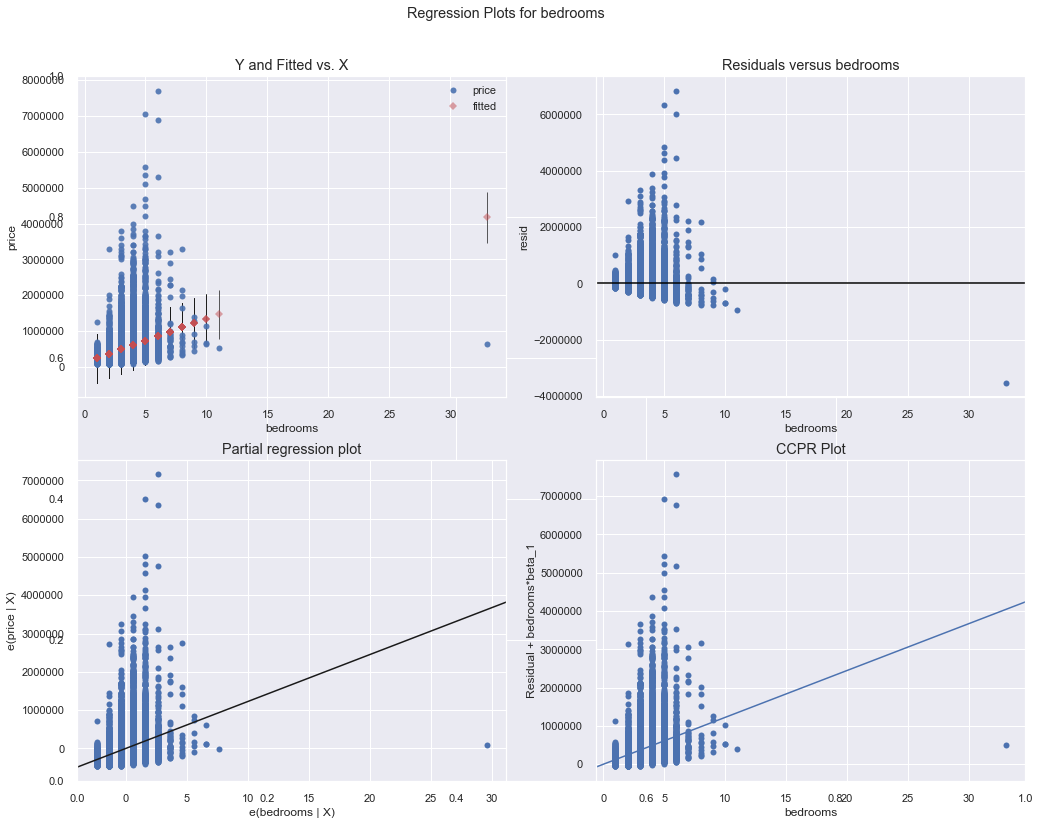

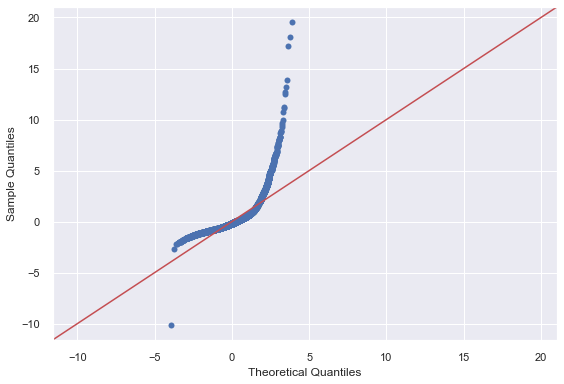

bedrooms: R2 0.095 , intercept 127199.513 , slope 122464.444 , p-value 0.000 , JB 1195104.832
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~bathrooms
-------------------------------------------------------------------------------------


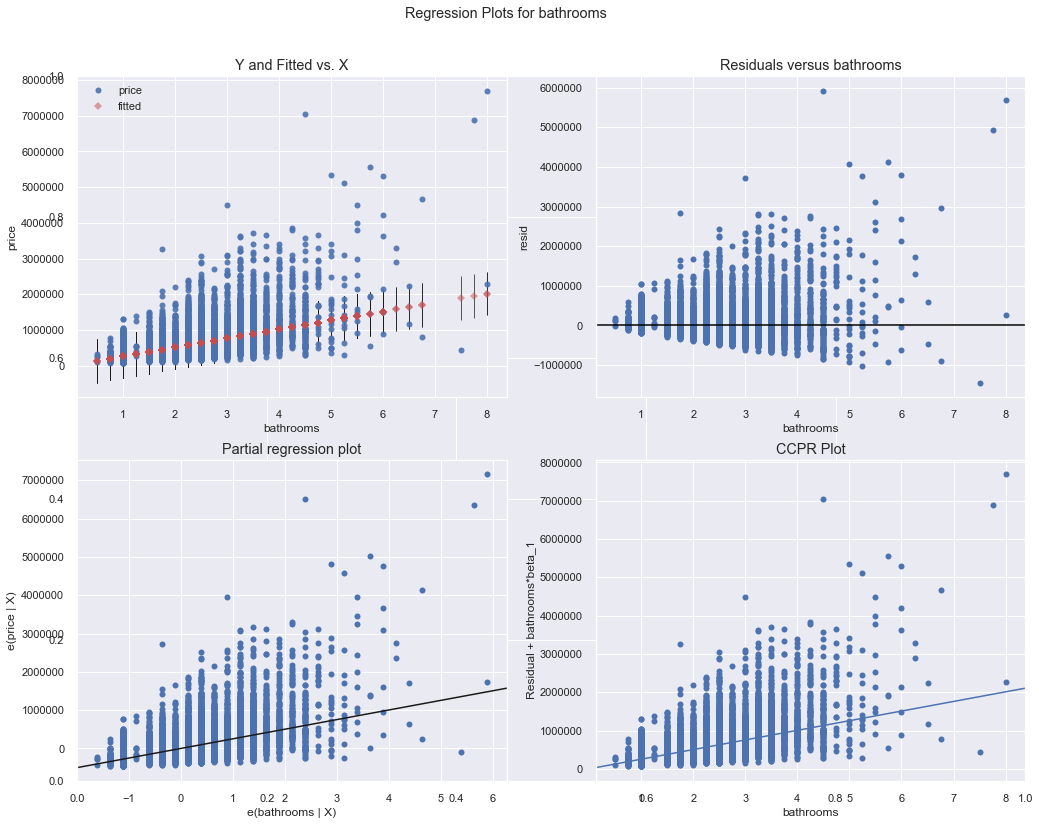

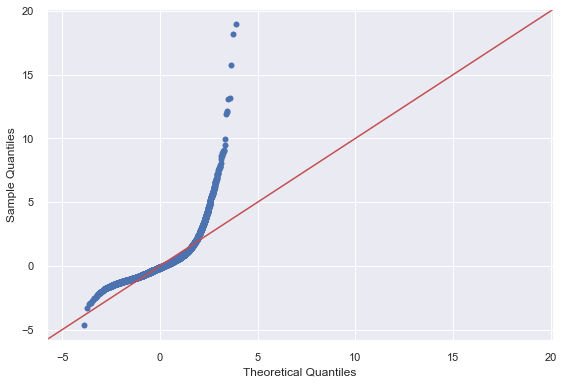

bathrooms: R2 0.277 , intercept 8712.652 , slope 251241.762 , p-value 0.000 , JB 882735.889
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~floors
-------------------------------------------------------------------------------------


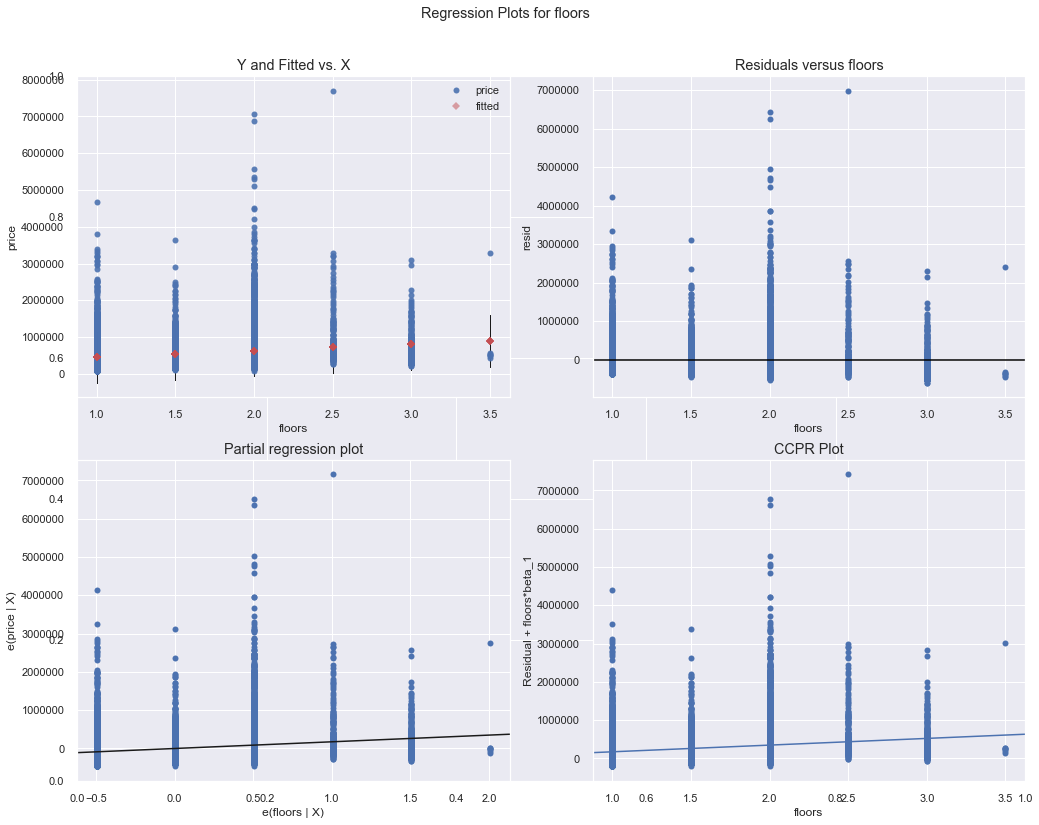

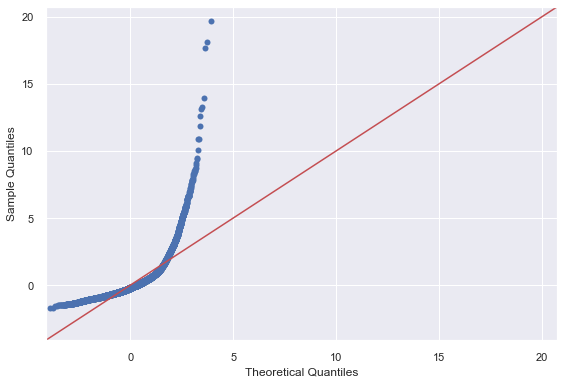

floors: R2 0.066 , intercept 279114.996 , slope 174809.053 , p-value 0.000 , JB 1255747.571
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~waterfront
-------------------------------------------------------------------------------------


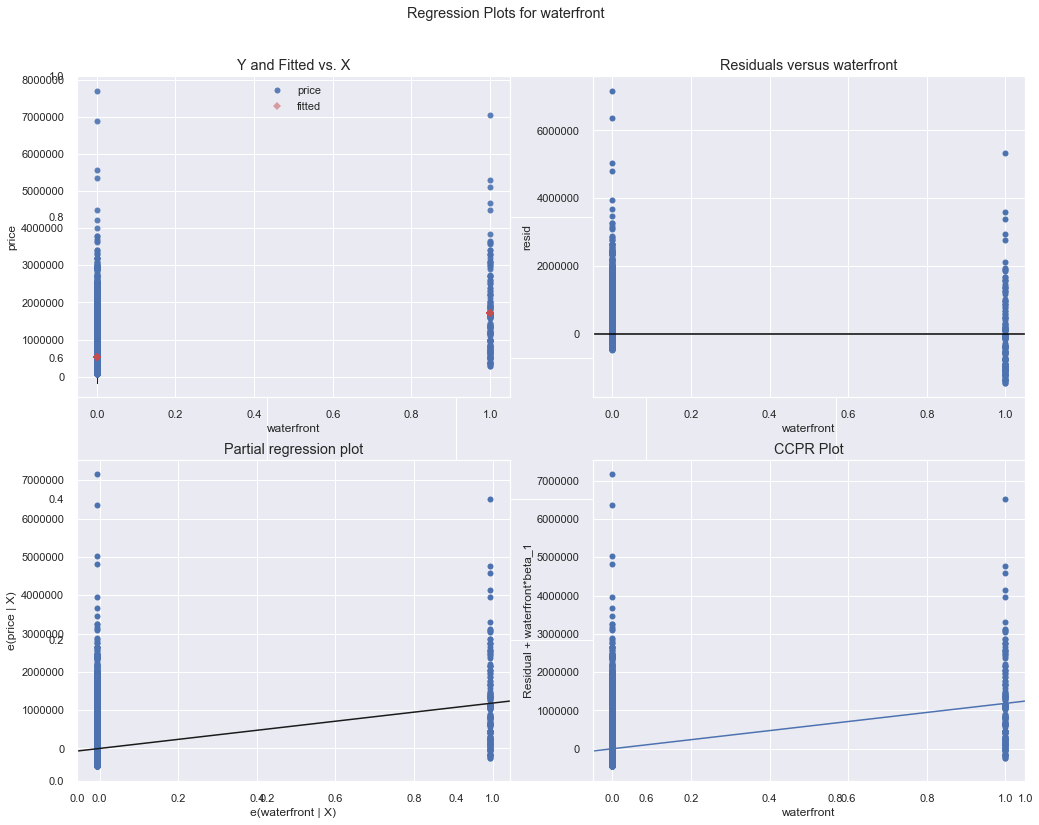

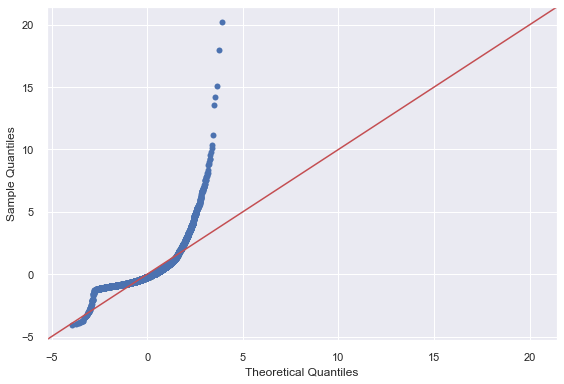

waterfront: R2 0.070 , intercept 532286.222 , slope 1184928.504 , p-value 0.000 , JB 909716.460
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~view
-------------------------------------------------------------------------------------


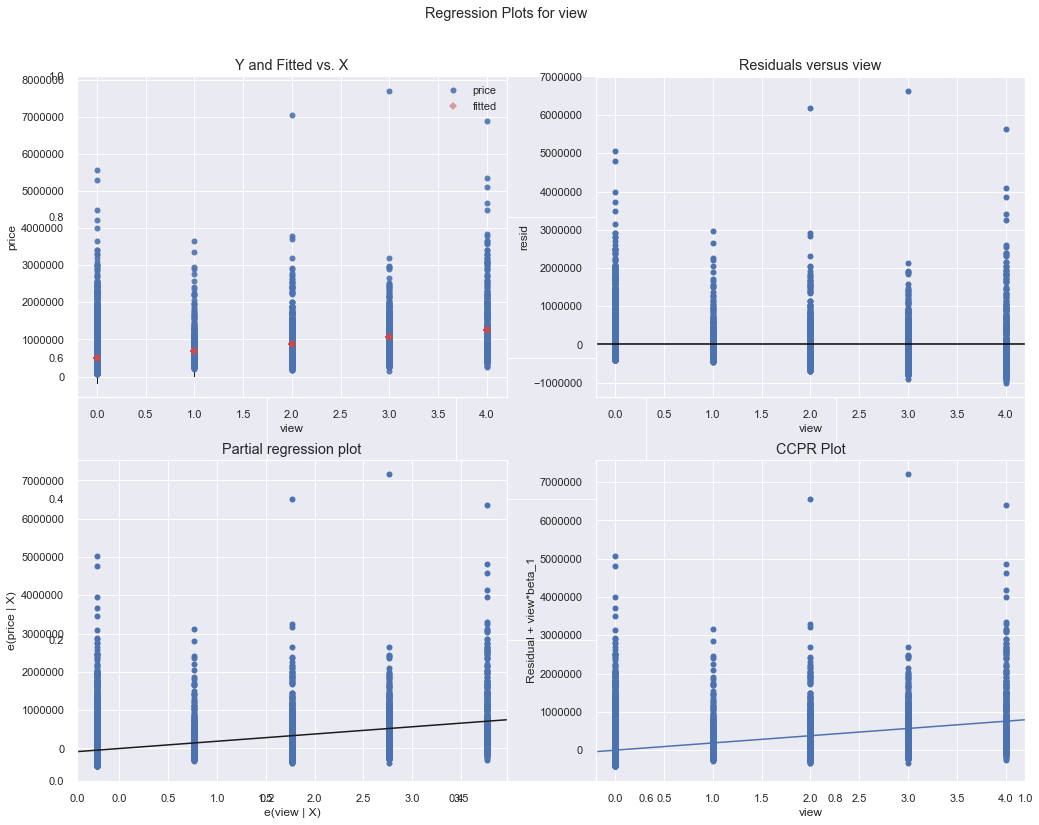

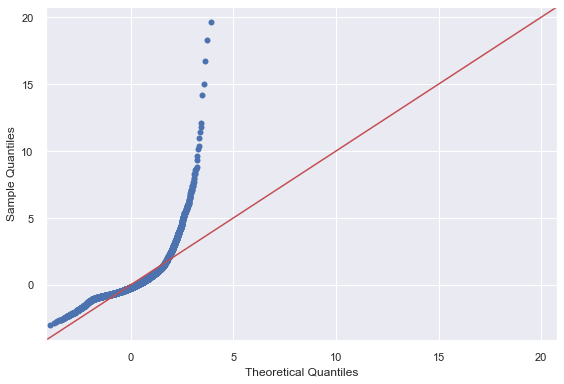

view: R2 0.155 , intercept 496214.773 , slope 189045.800 , p-value 0.000 , JB 1077903.665
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~condition
-------------------------------------------------------------------------------------


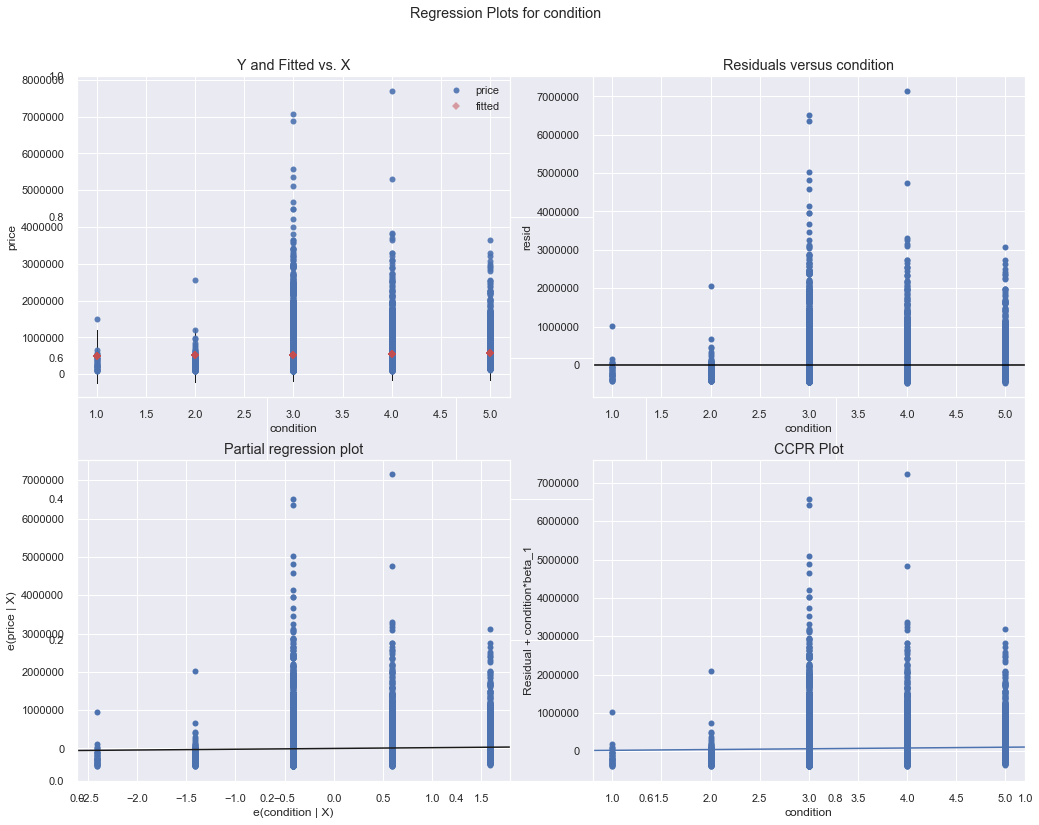

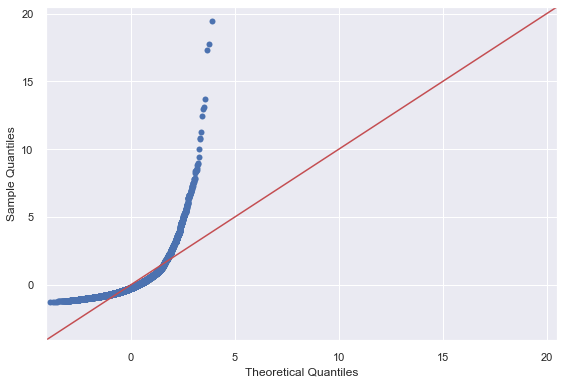

condition: R2 0.001 , intercept 470868.049 , slope 20361.313 , p-value 0.000 , JB 1136802.126
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~grade
-------------------------------------------------------------------------------------


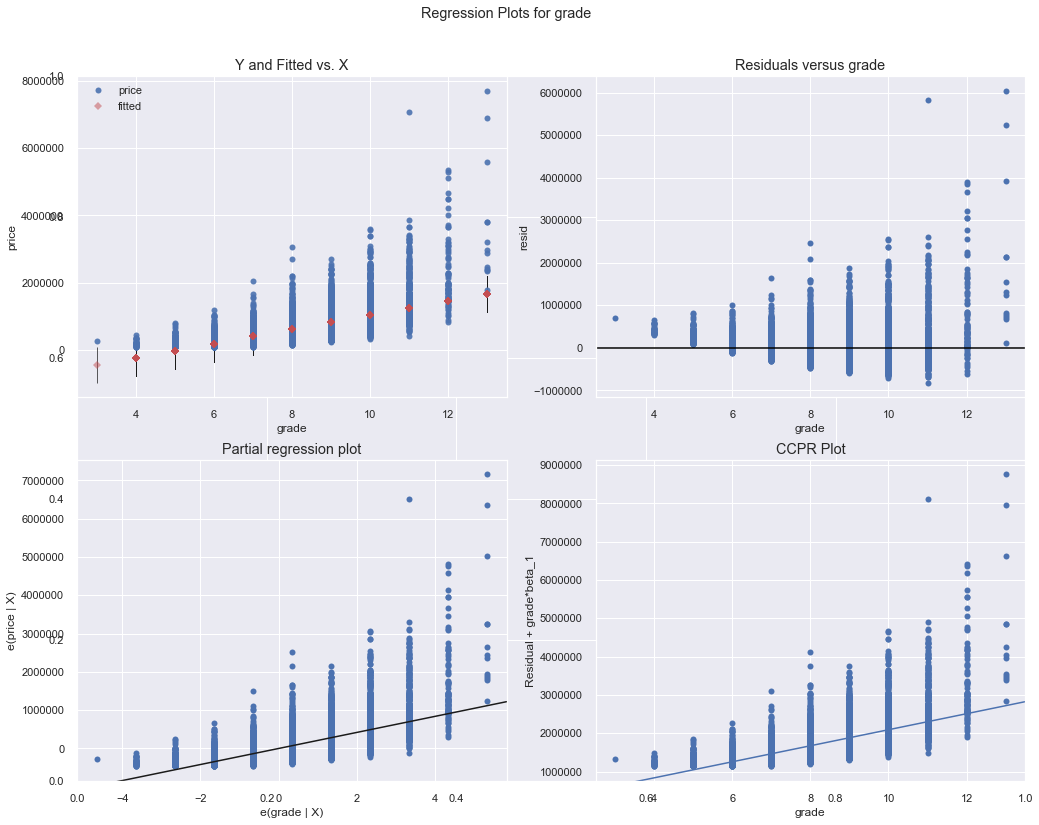

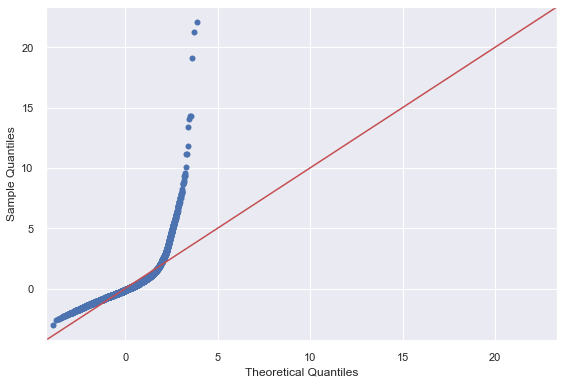

grade: R2 0.446 , intercept -1061415.992 , slope 209157.776 , p-value 0.000 , JB 2043898.709
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_renovated
-------------------------------------------------------------------------------------


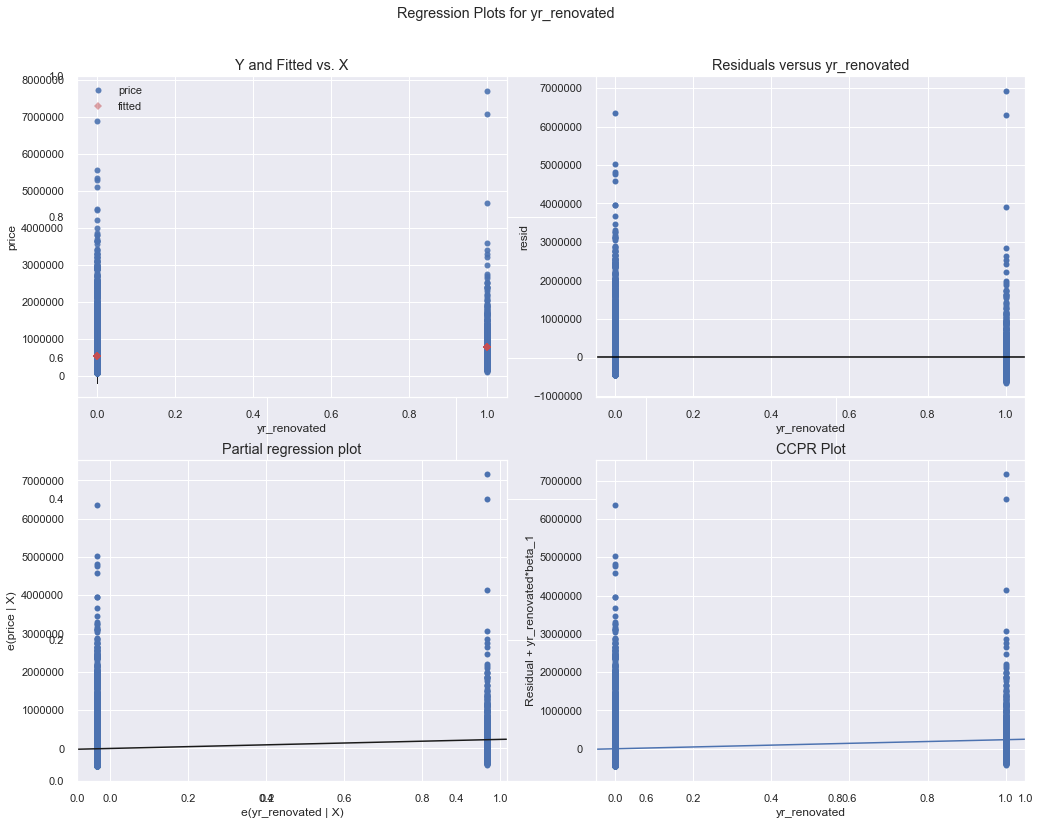

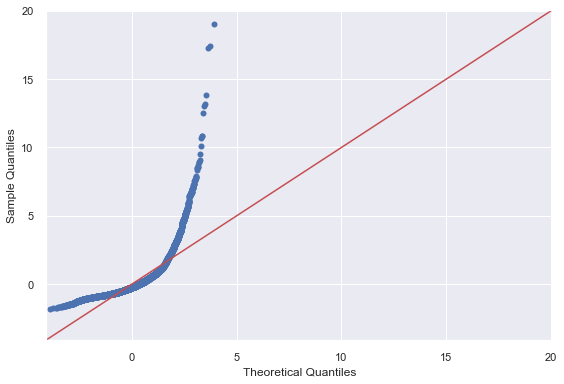

yr_renovated: R2 0.014 , intercept 532140.320 , slope 236761.573 , p-value 0.000 , JB 1076744.153
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~mo_sold
-------------------------------------------------------------------------------------


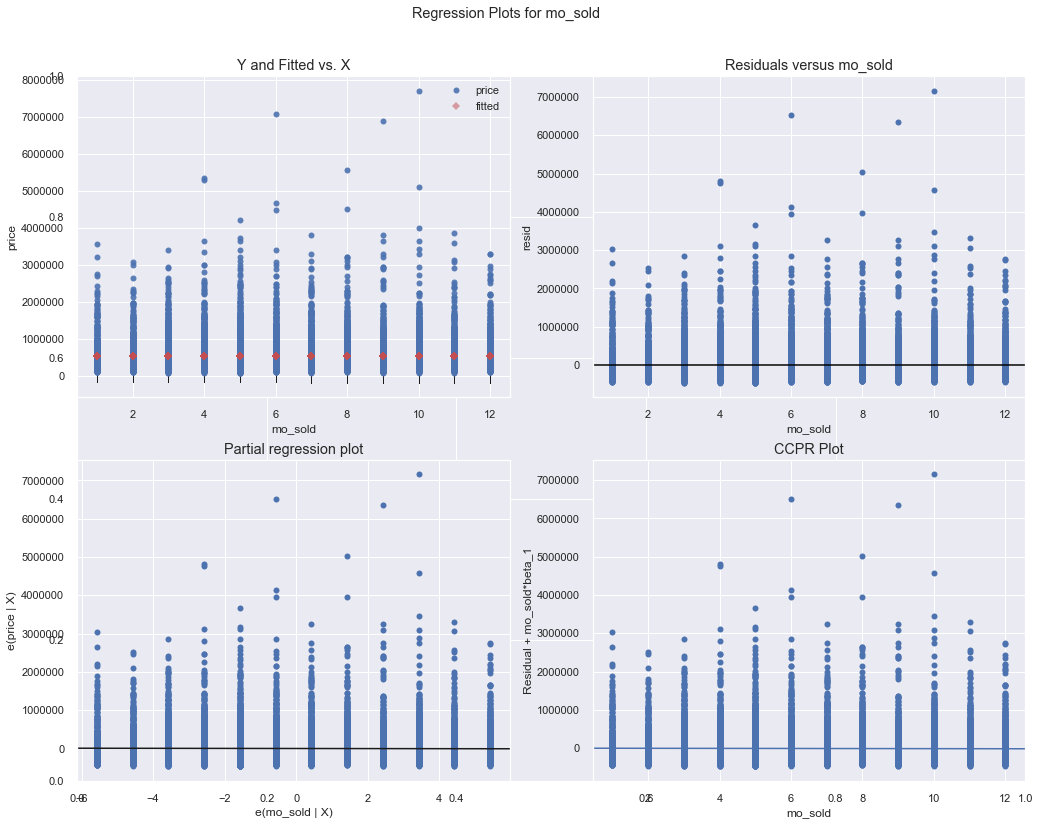

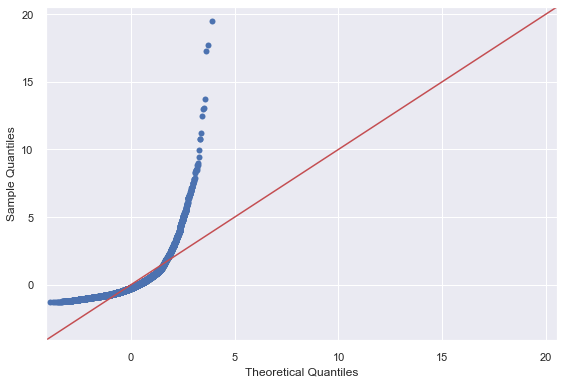

mo_sold: R2 0.000 , intercept 547993.848 , slope -1170.872 , p-value 0.145 , JB 1133360.178
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_living
-------------------------------------------------------------------------------------


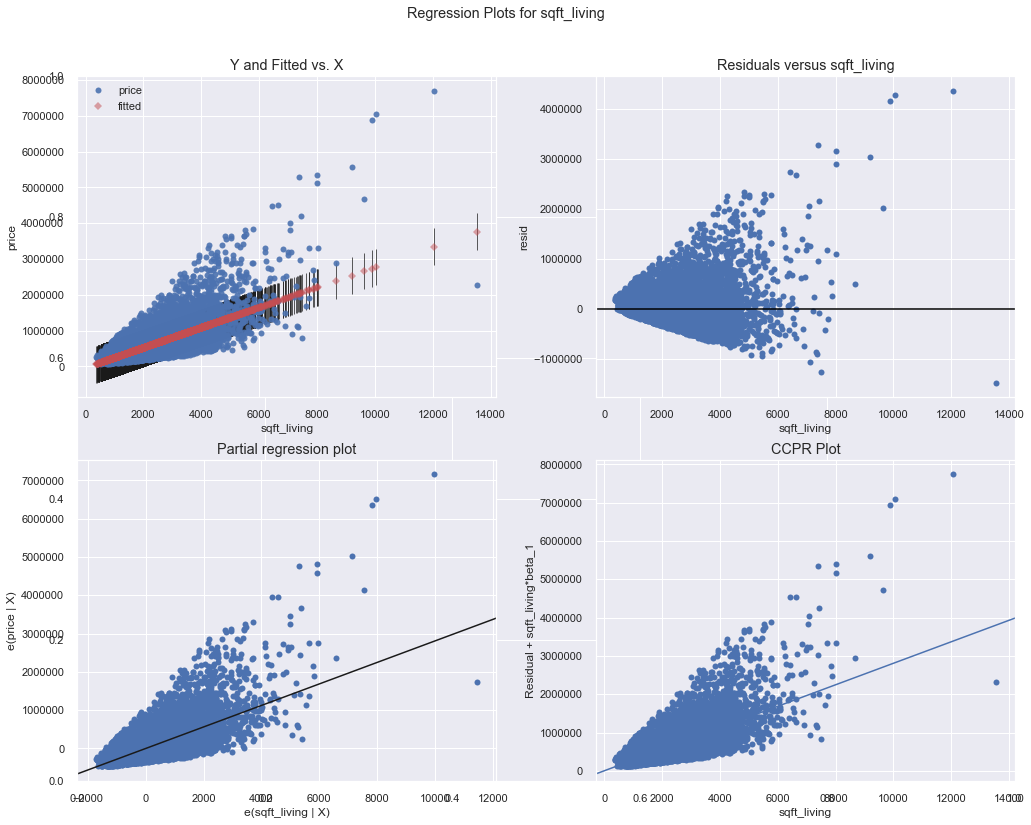

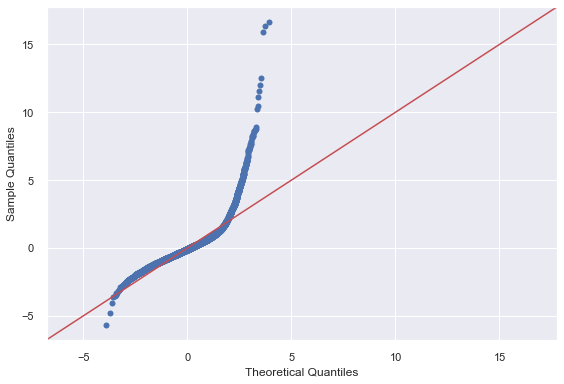

sqft_living: R2 0.493 , intercept -43988.892 , slope 280.863 , p-value 0.000 , JB 542662.604
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_lot
-------------------------------------------------------------------------------------


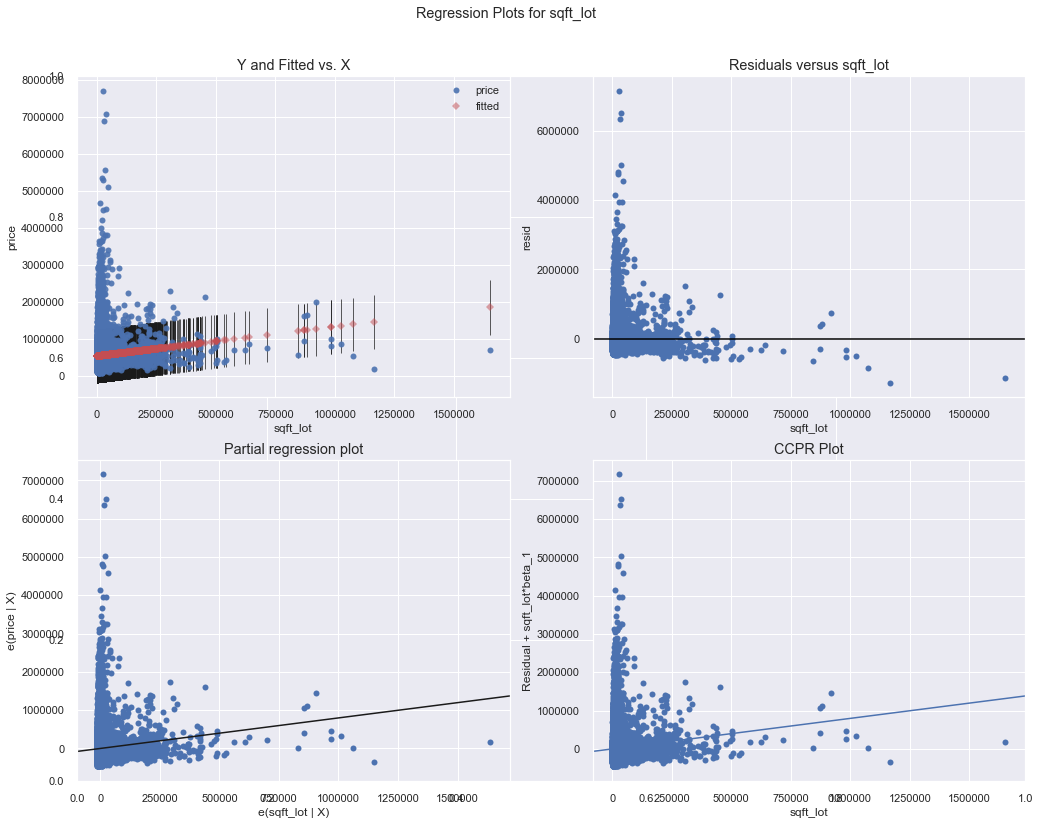

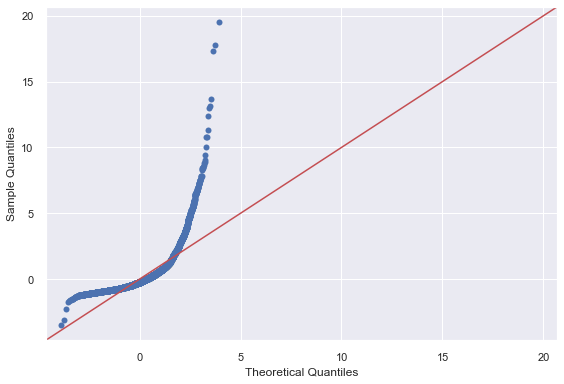

sqft_lot: R2 0.008 , intercept 528258.047 , slope 0.797 , p-value 0.000 , JB 1147708.008
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_above
-------------------------------------------------------------------------------------


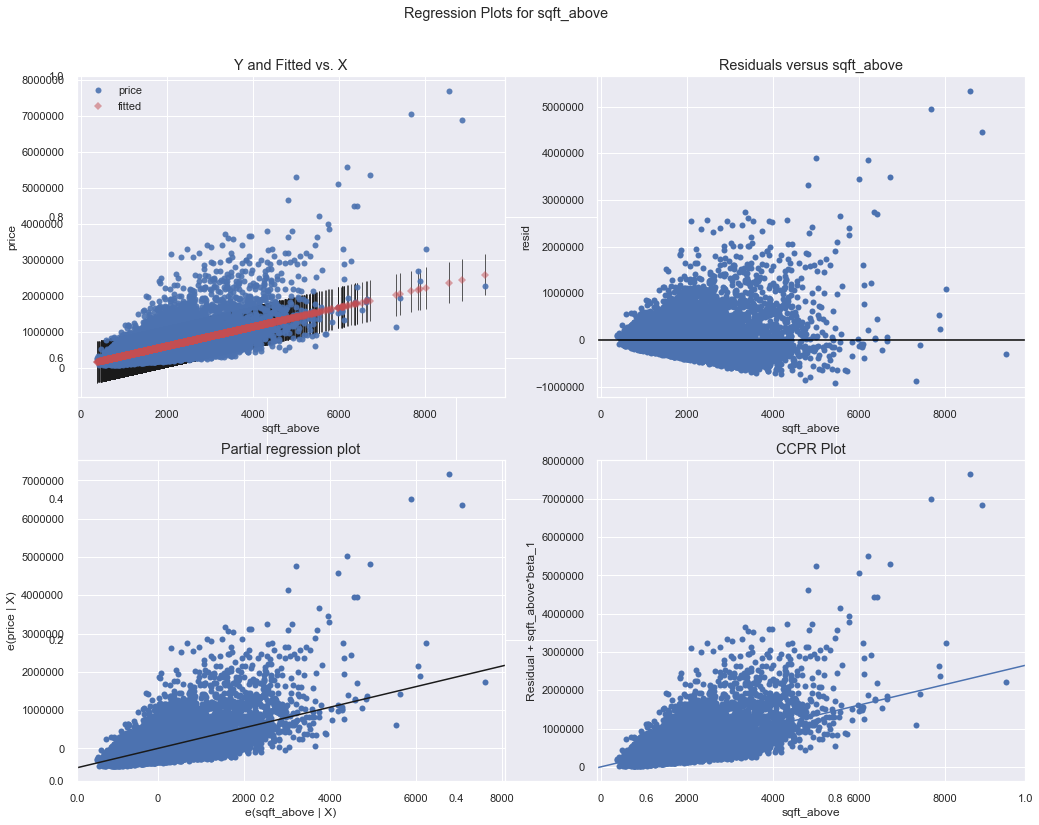

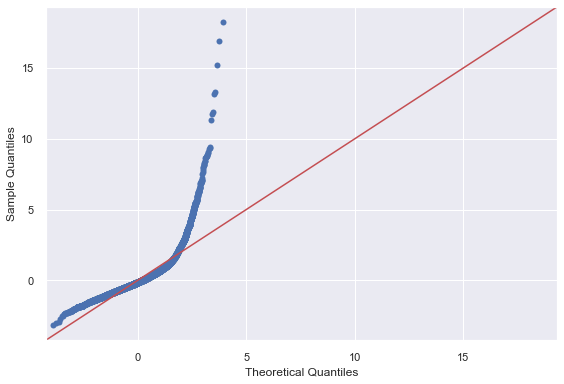

sqft_above: R2 0.366 , intercept 59757.111 , slope 268.668 , p-value 0.000 , JB 728366.432
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_basement
-------------------------------------------------------------------------------------


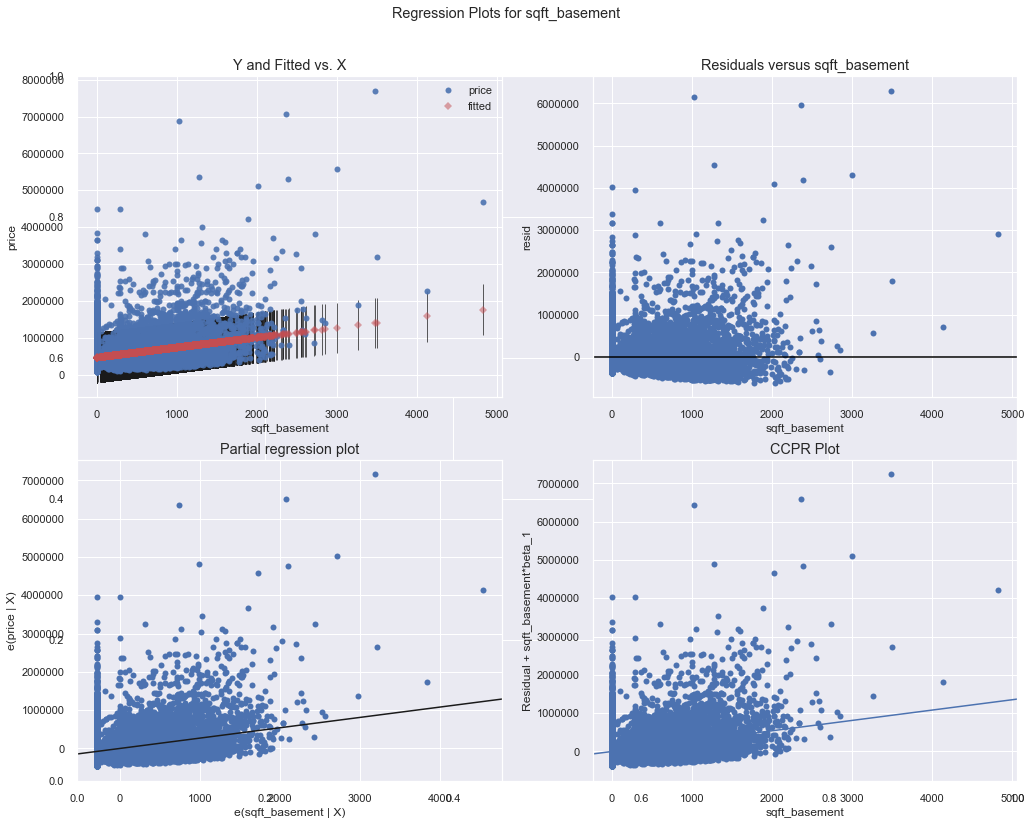

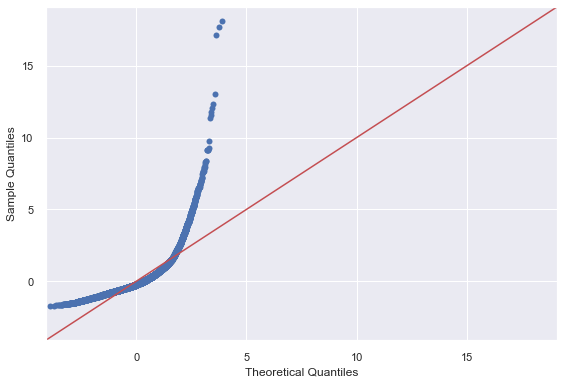

sqft_basement: R2 0.104 , intercept 461395.926 , slope 270.345 , p-value 0.000 , JB 883549.140
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_living15
-------------------------------------------------------------------------------------


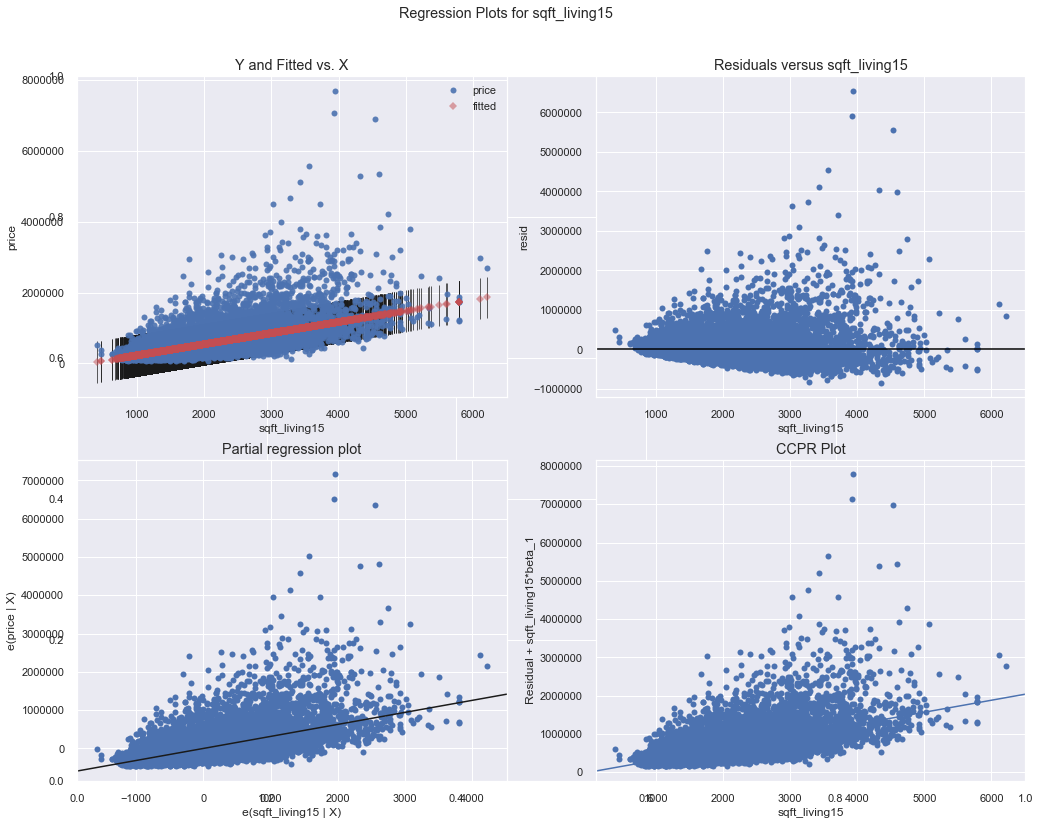

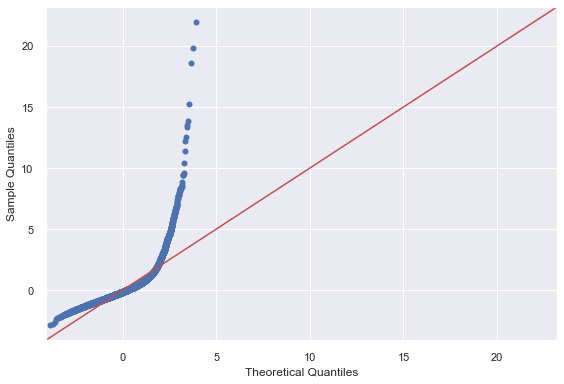

sqft_living15: R2 0.343 , intercept -83028.487 , slope 313.762 , p-value 0.000 , JB 1910578.895
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_lot15
-------------------------------------------------------------------------------------


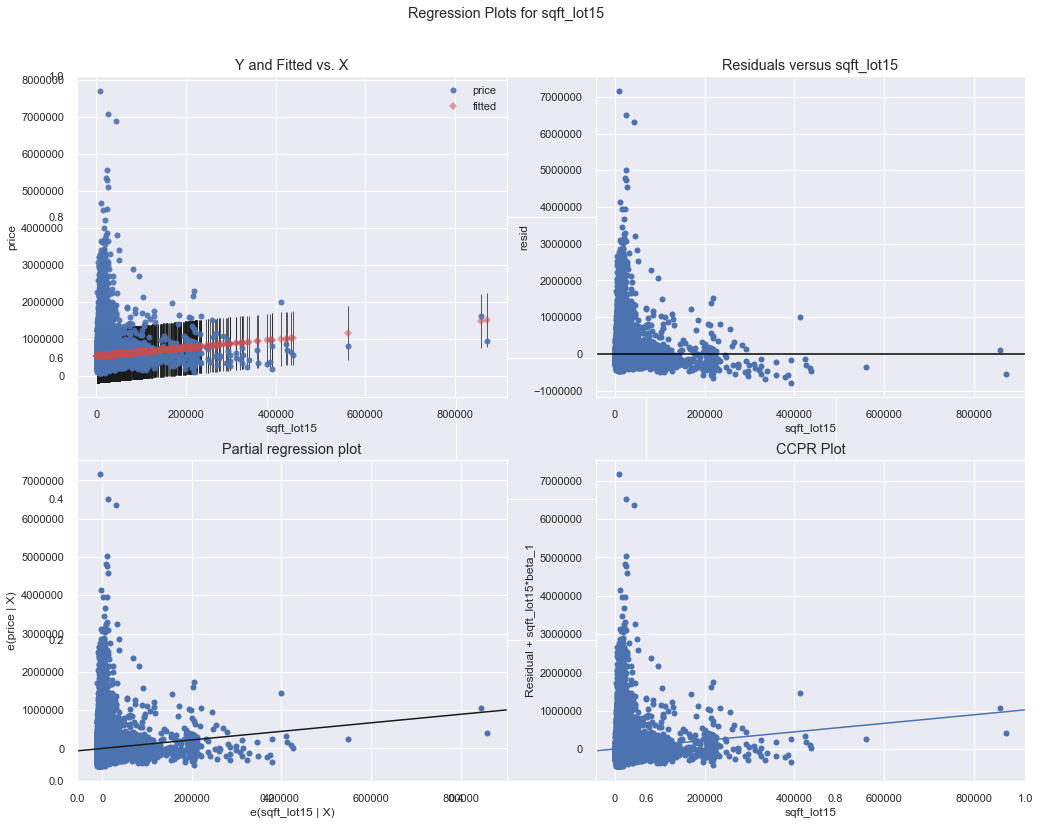

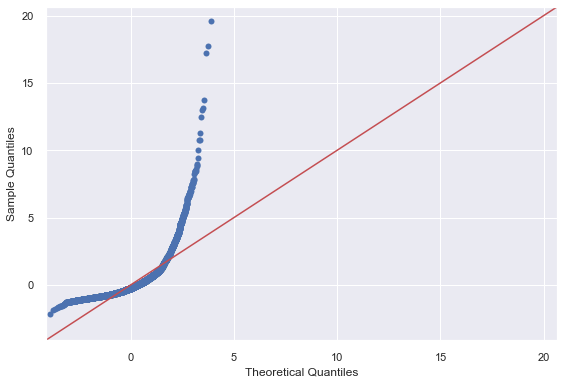

sqft_lot15: R2 0.007 , intercept 526060.055 , slope 1.116 , p-value 0.000 , JB 1142329.322
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_built
-------------------------------------------------------------------------------------


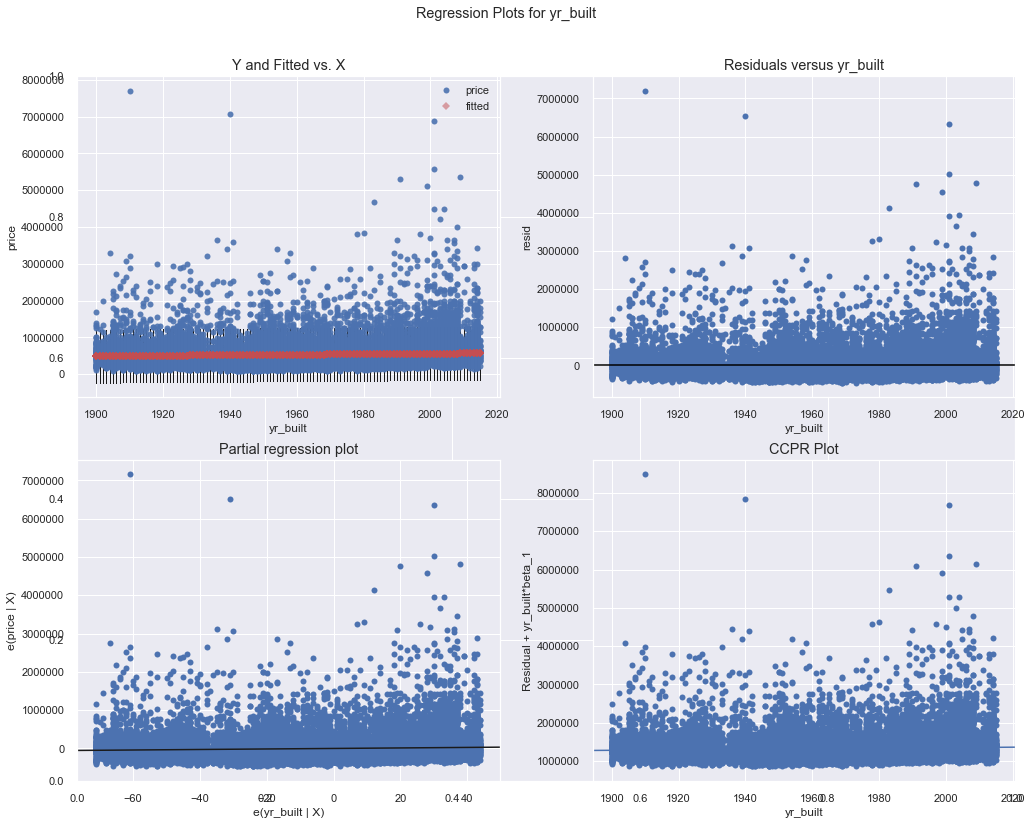

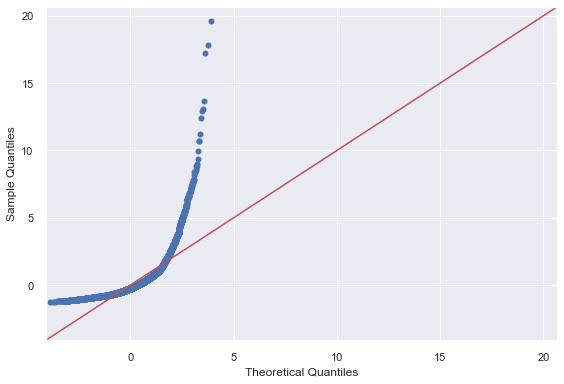

yr_built: R2 0.003 , intercept -789621.806 , slope 674.743 , p-value 0.000 , JB 1142512.023
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_renovated_korg
-------------------------------------------------------------------------------------


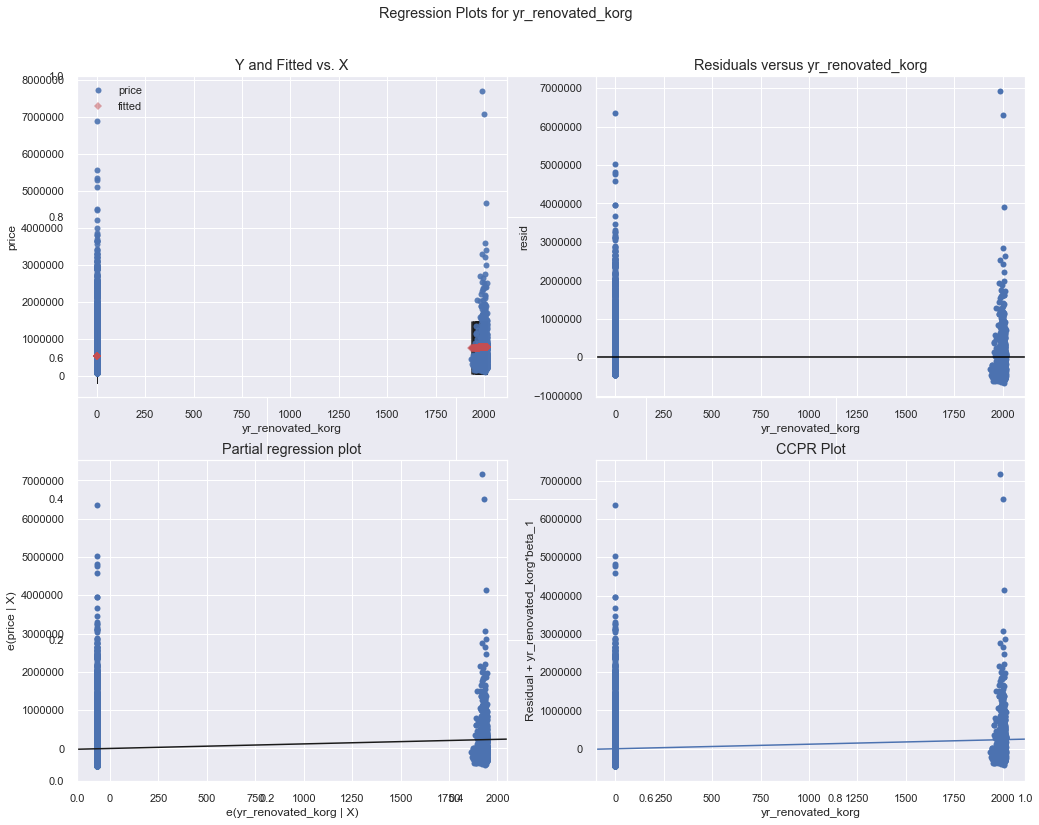

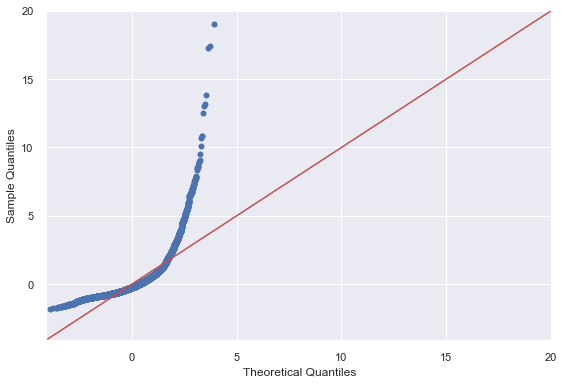

yr_renovated_korg: R2 0.014 , intercept 532118.919 , slope 118.934 , p-value 0.000 , JB 1076824.310
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~zipcode
-------------------------------------------------------------------------------------


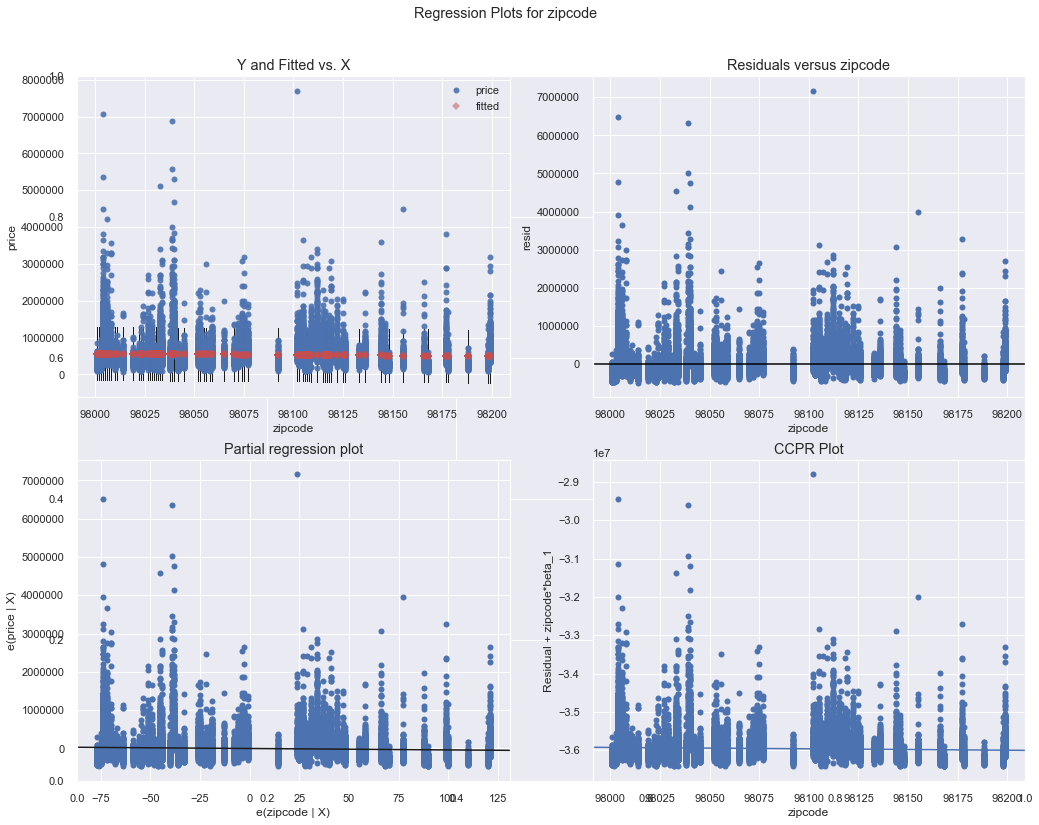

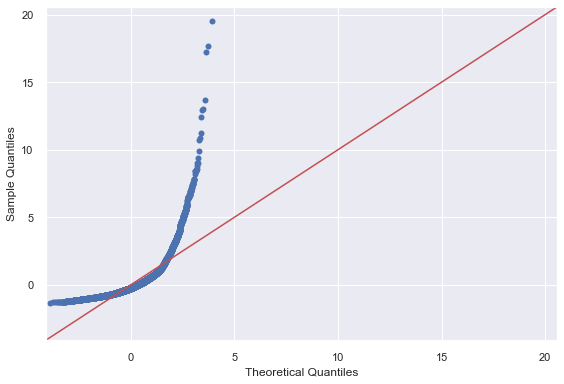

zipcode: R2 0.003 , intercept 36496518.028 , slope -366.609 , p-value 0.000 , JB 1123391.740
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~lat
-------------------------------------------------------------------------------------


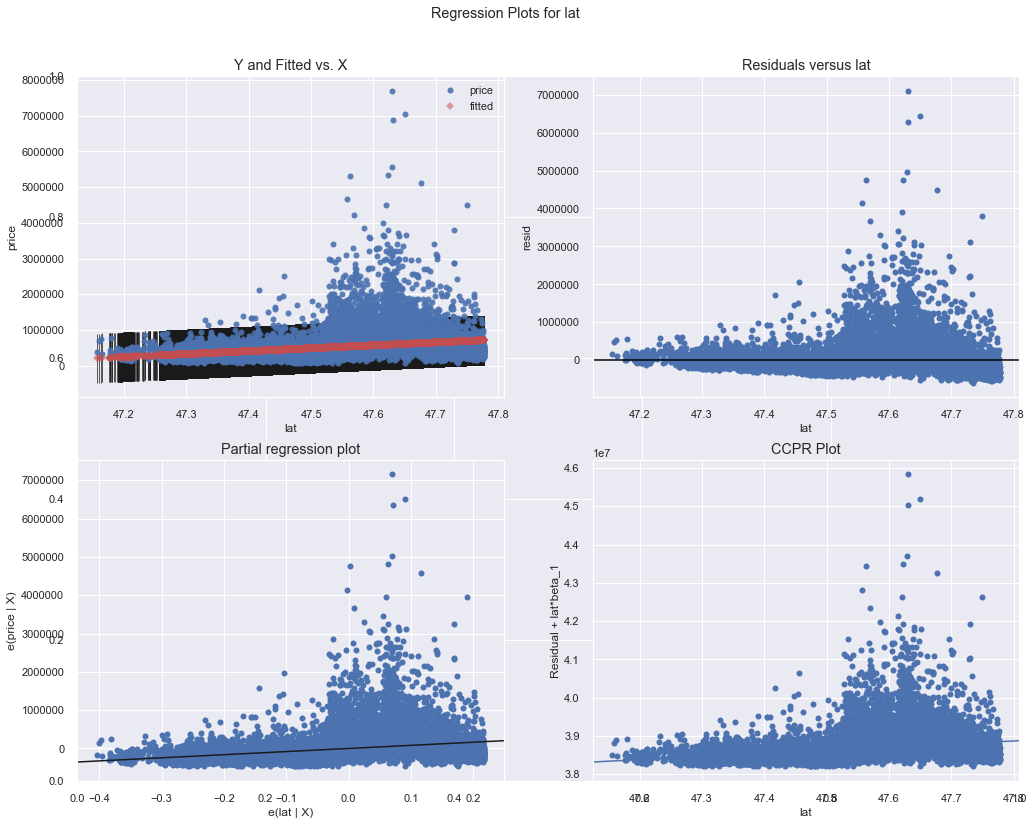

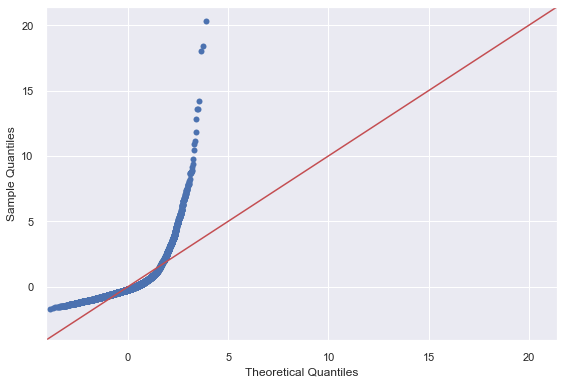

lat: R2 0.094 , intercept -38135120.407 , slope 813190.525 , p-value 0.000 , JB 1511477.644
Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~long
-------------------------------------------------------------------------------------


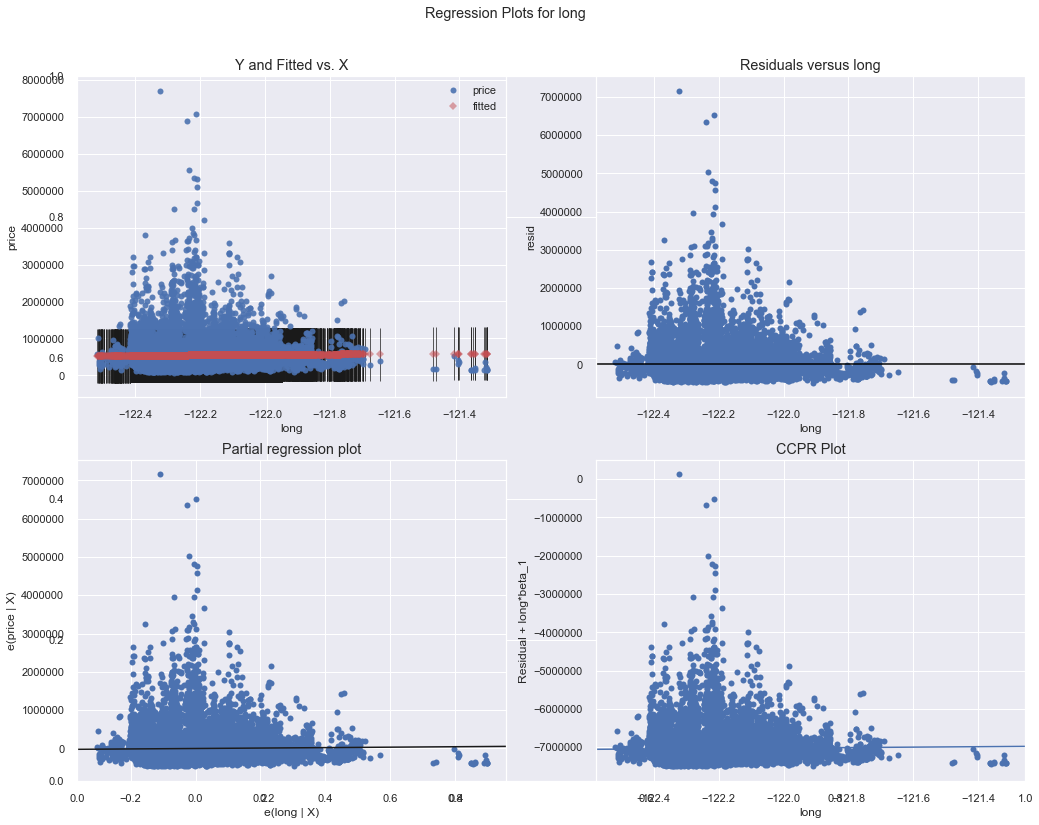

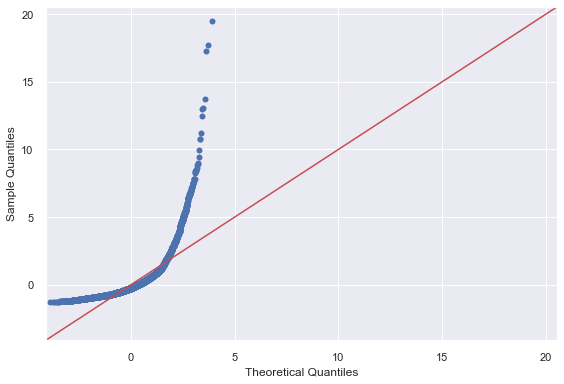

long: R2 0.000 , intercept 7570934.958 , slope 57527.283 , p-value 0.001 , JB 1137712.625
Press Enter to continue...


[['price', 1.0, -0.0, 1.0, 0.0, 1148479.22],
 ['bedrooms', 0.095, 127199.513, 122464.444, 0.0, 1195104.832],
 ['bathrooms', 0.277, 8712.652, 251241.762, 0.0, 882735.889],
 ['floors', 0.066, 279114.996, 174809.053, 0.0, 1255747.571],
 ['waterfront', 0.07, 532286.222, 1184928.504, 0.0, 909716.46],
 ['view', 0.155, 496214.773, 189045.8, 0.0, 1077903.665],
 ['condition', 0.001, 470868.049, 20361.313, 0.0, 1136802.126],
 ['grade', 0.446, -1061415.992, 209157.776, 0.0, 2043898.709],
 ['yr_renovated', 0.014, 532140.32, 236761.573, 0.0, 1076744.153],
 ['mo_sold', 0.0, 547993.848, -1170.872, 0.145, 1133360.178],
 ['sqft_living', 0.493, -43988.892, 280.863, 0.0, 542662.604],
 ['sqft_lot', 0.008, 528258.047, 0.797, 0.0, 1147708.008],
 ['sqft_above', 0.366, 59757.111, 268.668, 0.0, 728366.432],
 ['sqft_basement', 0.104, 461395.926, 270.345, 0.0, 883549.14],
 ['sqft_living15', 0.343, -83028.487, 313.762, 0.0, 1910578.895],
 ['sqft_lot15', 0.007, 526060.055, 1.116, 0.0, 1142329.322],
 ['yr_built', 0

In [54]:
results = []
for idx, col in enumerate(kc11_all.columns):
    print (f"King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~{col}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{col}'
    model = ols(formula=f, data=kc11_all).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    print(f'{col}: R2 {model.rsquared:5.3f} , intercept {model.params[0]:5.3f} , slope {model.params[1]:5.3f} , p-value {model.pvalues[1]:5.3f} , JB {sms.jarque_bera(model.resid)[0]:5.3f}')
    results.append([col, round(model.rsquared,3), round(model.params[0],3), round(model.params[1],3), round(model.pvalues[1],3), round(sms.jarque_bera(model.resid)[0],3)])
    input("Press Enter to continue...")
    
results

### multiple linear regression

In [61]:
kc12_all = kc11_all.drop(['price'], axis=1)
outcome = 'price'
x_cols = list(kc12_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_0 = ols(formula=formula, data=kc11_all).fit()
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2536.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:25:37   Log-Likelihood:            -2.9433e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21576   BIC:                         5.889e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.827e+06   2.92e+06      2.335      0.020     1.1e+06    1.26e+07
bedrooms          -3.627e+04   1896.401    -19.126      0.000      -4e+04   -3.26e+04
bathrooms          4.074e+04   3257.107     12.508      0.000    3.44e+04    4.71e+04
floors             7845.8572   3593.354      2.183      0.029     802.618    1.49e+04
waterfront         6.238e+05   1.81e+04     34.453      0.000    5.88e+05    6.59e+05
view                5.33e+04   2117.470     25.174      0.000    4.92e+04    5.75e+04
condition          2.818e+04   2344.876     12.019      0.000    2.36e+04    3.28e+04
grade              9.618e+04   2157.669     44.574      0.000    9.19e+04       1e+05
yr_renovated      -6.926e+06   9.48e+05     -7.303      0.000   -8.79e+06   -5.07e+06
mo_sold           -3086.7479    439.031     -7.031      0.000   -3947.281   -2226.215
sqft_living          84.1764     21.170      3.976      0.000      42.681     125.672
sqft_lot              0.1290      0.048      2.698      0.007       0.035       0.223
sqft_above           97.7386     21.182      4.614      0.000      56.220     139.257
sqft_basement        66.6146     21.162      3.148      0.002      25.135     108.094
sqft_living15        21.9617      3.443      6.378      0.000      15.212      28.711
sqft_lot15           -0.3846      0.073     -5.256      0.000      -0.528      -0.241
yr_built          -2636.9134     71.760    -36.746      0.000   -2777.569   -2496.258
yr_renovated_korg  3493.8844    475.213      7.352      0.000    2562.433    4425.336
zipcode            -587.8824     32.913    -17.862      0.000    -652.394    -523.371
lat                6.023e+05   1.07e+04     56.219      0.000    5.81e+05    6.23e+05
long              -2.185e+05   1.31e+04    -16.652      0.000   -2.44e+05   -1.93e+05
==============================================================================
Omnibus:                    18419.059   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1881263.455
Skew:                           3.580   Prob(JB):                         0.00
Kurtosis:                      48.159   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
kc11_all.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_renovated', 'mo_sold', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'yr_built', 'yr_renovated_korg', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [63]:
cats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'mo_sold', 'yr_renovated']
kc11_cat = kc11_all.loc[:, cats]
kc11_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
bedrooms        21597 non-null int64
bathrooms       21597 non-null float64
floors          21597 non-null float64
waterfront      21597 non-null float64
view            21597 non-null float64
condition       21597 non-null int64
grade           21597 non-null int64
mo_sold         21597 non-null int64
yr_renovated    21597 non-null float64
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


In [64]:
kc11_acat = pd.get_dummies(kc11_all, columns=cats, drop_first=True)
kc11_acat.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated_korg',
       'zipcode', 'lat', 'long', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bedrooms_33', 'bathrooms_0.75',
       'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75',
       'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75',
       'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5', 'bathrooms_6.75',
       'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_1.0', 'view_1.0'

In [65]:
kc11_acat_renamed = transform_colname(kc11_acat)
kc11_acat_renamed.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated_korg',
       'zipcode', 'lat', 'long', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bedrooms_33', 'bathrooms_075',
       'bathrooms_10', 'bathrooms_125', 'bathrooms_15', 'bathrooms_175',
       'bathrooms_20', 'bathrooms_225', 'bathrooms_25', 'bathrooms_275',
       'bathrooms_30', 'bathrooms_325', 'bathrooms_35', 'bathrooms_375',
       'bathrooms_40', 'bathrooms_425', 'bathrooms_45', 'bathrooms_475',
       'bathrooms_50', 'bathrooms_525', 'bathrooms_55', 'bathrooms_575',
       'bathrooms_60', 'bathrooms_625', 'bathrooms_65', 'bathrooms_675',
       'bathrooms_75', 'bathrooms_775', 'bathrooms_80', 'floors_15',
       'floors_20', 'floors_25', 'floors_30', 'floors_35', 'waterfront_10',
       'view_10', 'view_20', 'view_30', 'view_40', 

In [66]:
kc12_acat = kc11_acat_renamed.drop(['price'], axis=1)
outcome = 'price'
x_cols = list(kc12_acat.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_1 = ols(formula=formula, data=kc11_acat_renamed).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     733.1
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:26:02   Log-Likelihood:            -2.9261e+05
No. Observations:               21597   AIC:                         5.854e+05
Df Residuals:                   21510   BIC:                         5.861e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           1.14e+07   2.75e+06      4.138      0.000       6e+06    1.68e+07
sqft_living          73.2243     19.672      3.722      0.000      34.666     111.782
sqft_lot              0.1316      0.044      2.963      0.003       0.045       0.219
sqft_above           50.1545     19.717      2.544      0.011      11.508      88.801
sqft_basement        52.7833     19.657      2.685      0.007      14.254      91.313
sqft_living15        39.0873      3.282     11.909      0.000      32.654      45.520
sqft_lot15           -0.4469      0.068     -6.576      0.000      -0.580      -0.314
yr_built          -1922.5701     74.702    -25.737      0.000   -2068.991   -1776.149
yr_renovated_korg  3887.3596    440.652      8.822      0.000    3023.649    4751.070
zipcode            -605.6318     30.756    -19.692      0.000    -665.916    -545.348
lat                6.058e+05      1e+04     60.317      0.000    5.86e+05    6.25e+05
long              -1.887e+05   1.23e+04    -15.342      0.000   -2.13e+05   -1.65e+05
bedrooms_2         9594.1291   1.43e+04      0.672      0.502   -1.84e+04    3.76e+04
bedrooms_3         -1.13e+04   1.43e+04     -0.790      0.429   -3.93e+04    1.67e+04
bedrooms_4        -3.561e+04   1.46e+04     -2.438      0.015   -6.42e+04   -6986.659
bedrooms_5        -3.928e+04   1.54e+04     -2.554      0.011   -6.94e+04   -9140.209
bedrooms_6        -9.581e+04   1.88e+04     -5.110      0.000   -1.33e+05   -5.91e+04
bedrooms_7         -1.94e+05   3.44e+04     -5.638      0.000   -2.61e+05   -1.27e+05
bedrooms_8         2.263e+04   5.45e+04      0.415      0.678   -8.42e+04     1.3e+05
bedrooms_9        -1.819e+05   8.52e+04     -2.136      0.033   -3.49e+05    -1.5e+04
bedrooms_10       -1.823e+05    1.1e+05     -1.661      0.097   -3.98e+05    3.29e+04
bedrooms_11       -2.585e+05   1.87e+05     -1.385      0.166   -6.24e+05    1.07e+05
bedrooms_33        8.408e+04   1.86e+05      0.451      0.652   -2.81e+05    4.49e+05
bathrooms_075      2.916e+04   9.58e+04      0.304      0.761   -1.59e+05    2.17e+05
bathrooms_10       6.502e+04    9.3e+04      0.699      0.485   -1.17e+05    2.47e+05
bathrooms_125      7.202e+04   1.12e+05      0.644      0.519   -1.47e+05    2.91e+05
bathrooms_15       7.086e+04   9.31e+04      0.761      0.447   -1.12e+05    2.53e+05
bathrooms_175      6.664e+04   9.31e+04      0.716      0.474   -1.16e+05    2.49e+05
bathrooms_20       7.673e+04   9.31e+04      0.824      0.410   -1.06e+05    2.59e+05
bathrooms_225      8.226e+04   9.31e+04      0.883      0.377      -1e+05    2.65e+05
bathrooms_25       6.874e+04   9.31e+04      0.738      0.460   -1.14e+05    2.51e+05
bathrooms_275      7.781e+04   9.32e+04      0.834      0.404   -1.05e+05    2.61e+05
bathrooms_30        1.06e+05   9.33e+04      1.135      0.256    -7.7e+04

In [67]:
train, test = train_test_split(kc11_acat_renamed, test_size=0.25, random_state=42)
formula = outcome + '~' + predictors
model_train_v0 = ols(formula=formula, data=train).fit()
model_train_v0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     599.8
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:36:36   Log-Likelihood:            -2.1916e+05
No. Observations:               16197   AIC:                         4.385e+05
Df Residuals:                   16114   BIC:                         4.391e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept              1e+07   3.12e+06      3.203      0.001    3.88e+06    1.61e+07
sqft_living          67.9186     23.277      2.918      0.004      22.292     113.545
sqft_lot              0.1029      0.051      2.032      0.042       0.004       0.202
sqft_above           41.9412     23.302      1.800      0.072      -3.733      87.615
sqft_basement        50.8967     23.233      2.191      0.028       5.358      96.435
sqft_living15        46.0523      3.758     12.253      0.000      38.685      53.419
sqft_lot15           -0.4311      0.078     -5.551      0.000      -0.583      -0.279
yr_built          -1978.6926     84.867    -23.315      0.000   -2145.042   -1812.343
yr_renovated_korg  3768.7423    518.775      7.265      0.000    2751.886    4785.599
zipcode            -573.5692     34.924    -16.423      0.000    -642.024    -505.115
lat                5.917e+05   1.14e+04     51.678      0.000    5.69e+05    6.14e+05
long              -1.806e+05   1.39e+04    -13.012      0.000   -2.08e+05   -1.53e+05
bedrooms_2         8208.3124   1.61e+04      0.511      0.610   -2.33e+04    3.97e+04
bedrooms_3        -1.155e+04   1.61e+04     -0.717      0.473   -4.31e+04       2e+04
bedrooms_4        -3.175e+04   1.64e+04     -1.932      0.053    -6.4e+04     463.939
bedrooms_5        -3.483e+04   1.73e+04     -2.010      0.044   -6.88e+04    -860.794
bedrooms_6        -6.953e+04   2.13e+04     -3.266      0.001   -1.11e+05   -2.78e+04
bedrooms_7         -1.53e+05   3.69e+04     -4.144      0.000   -2.25e+05   -8.06e+04
bedrooms_8        -4.557e+04    6.1e+04     -0.747      0.455   -1.65e+05     7.4e+04
bedrooms_9        -1.067e+05   9.38e+04     -1.138      0.255    -2.9e+05    7.71e+04
bedrooms_10       -1.738e+05   1.34e+05     -1.300      0.194   -4.36e+05    8.83e+04
bedrooms_11       -2.361e+05   1.84e+05     -1.285      0.199   -5.96e+05    1.24e+05
bedrooms_33        3.123e-07   6.67e-07      0.469      0.639   -9.94e-07    1.62e-06
bathrooms_075      3.955e+04    9.5e+04      0.416      0.677   -1.47e+05    2.26e+05
bathrooms_10       7.016e+04   9.15e+04      0.767      0.443   -1.09e+05    2.49e+05
bathrooms_125      1.496e+05   1.23e+05      1.218      0.223   -9.11e+04     3.9e+05
bathrooms_15       7.706e+04   9.16e+04      0.841      0.400   -1.03e+05    2.57e+05
bathrooms_175      7.517e+04   9.16e+04      0.821      0.412   -1.04e+05    2.55e+05
bathrooms_20       8.163e+04   9.16e+04      0.891      0.373   -9.79e+04    2.61e+05
bathrooms_225       8.65e+04   9.16e+04      0.944      0.345   -9.31e+04    2.66e+05
bathrooms_25       7.724e+04   9.16e+04      0.843      0.399   -1.02e+05    2.57e+05
bathrooms_275      8.274e+04   9.18e+04      0.902      0.367   -9.71e+04    2.63e+05
bathrooms_30       1.127e+05   9.19e+04      1.227      0.220   -6.74e+04

In [68]:
summary = model_train_v0.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
p_table.head(20)

0                        coef    std err          t  P>|t|     [0.025  \
                                                                        
Intercept               1e+07   3.12e+06      3.203  0.001   3.88e+06   
sqft_living           67.9186     23.277      2.918  0.004     22.292   
sqft_lot               0.1029      0.051      2.032  0.042      0.004   
sqft_above            41.9412     23.302      1.800  0.072     -3.733   
sqft_basement         50.8967     23.233      2.191  0.028      5.358   
sqft_living15         46.0523      3.758     12.253  0.000     38.685   
sqft_lot15            -0.4311      0.078     -5.551  0.000     -0.583   
yr_built           -1978.6926     84.867    -23.315  0.000  -2145.042   
yr_renovated_korg   3768.7423    518.775      7.265  0.000   2751.886   
zipcode             -573.5692     34.924    -16.423  0.000   -642.024   
lat                 5.917e+05   1.14e+04     51.678  0.000   5.69e+05   
long               -1.806e+05   1.39e+04    -13.012  0.000  -2.08e+05   
bedrooms_2          8208.3124   1.61e+04      0.511  0.610  -2.33e+04   
bedrooms_3         -1.155e+04   1.61e+04     -0.717  0.473  -4.31e+04   
bedrooms_4         -3.175e+04   1.64e+04     -1.932  0.053   -6.4e+04   
bedrooms_5         -3.483e+04   1.73e+04     -2.010  0.044  -6.88e+04   
bedrooms_6         -6.953e+04   2.13e+04     -3.266  0.001  -1.11e+05   
bedrooms_7          -1.53e+05   3.69e+04     -4.144  0.000  -2.25e+05   
bedrooms_8         -4.557e+04    6.1e+04     -0.747  0.455  -1.65e+05   
bedrooms_9         -1.067e+05   9.38e+04     -1.138  0.255   -2.9e+05   

0                     0.975]  
                              
Intercept           1.61e+07  
sqft_living          113.545  
sqft_lot               0.202  
sqft_above            87.615  
sqft_basement         96.435  
sqft_living15         53.419  
sqft_lot15            -0.279  
yr_built           -1812.343  
yr_renovated_korg   4785.599  
zipcode             -505.115  
lat                 6.14e+05  
long               -1.53e+05  
bedrooms_2          3.97e+04  
bedrooms_3             2e+04  
bedrooms_4           463.939  
bedrooms_5          -860.794  
bedrooms_6         -2.78e+04  
bedrooms_7         -8.06e+04  
bedrooms_8           7.4e+04  
bedrooms_9          7.71e+04

In [69]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_train_v1 = ols(formula=formula, data=train).fit()
model_train_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     971.2
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:46:09   Log-Likelihood:            -2.2015e+05
No. Observations:               16197   AIC:                         4.404e+05
Df Residuals:                   16153   BIC:                         4.407e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.646e+06   3.27e+06     -1.116      0.264      -1e+07    2.76e+06
sqft_living         171.2242      3.689     46.413      0.000     163.993     178.455
sqft_lot              0.1872      0.054      3.490      0.000       0.082       0.292
sqft_basement       -17.7398      4.914     -3.610      0.000     -27.373      -8.107
sqft_living15        86.2974      3.789     22.777      0.000      78.871      93.724
sqft_lot15           -0.5069      0.082     -6.172      0.000      -0.668      -0.346
yr_built          -1440.7600     81.586    -17.659      0.000   -1600.677   -1280.843
yr_renovated_korg  4799.3024    548.667      8.747      0.000    3723.854    5874.751
zipcode            -570.9631     36.805    -15.513      0.000    -643.104    -498.822
lat                6.663e+05   1.19e+04     55.995      0.000    6.43e+05     6.9e+05
long              -2.515e+05   1.45e+04    -17.307      0.000    -2.8e+05   -2.23e+05
bedrooms_5        -2.509e+04   6225.508     -4.030      0.000   -3.73e+04   -1.29e+04
bedrooms_6        -8.783e+04   1.44e+04     -6.097      0.000   -1.16e+05   -5.96e+04
bedrooms_7        -1.619e+05    3.5e+04     -4.624      0.000   -2.31e+05   -9.33e+04
bathrooms_375      1.548e+05    1.9e+04      8.125      0.000    1.17e+05    1.92e+05
bathrooms_40       1.241e+05   1.91e+04      6.493      0.000    8.66e+04    1.62e+05
bathrooms_425      2.512e+05    2.5e+04     10.037      0.000    2.02e+05       3e+05
bathrooms_45       1.498e+05   2.27e+04      6.608      0.000    1.05e+05    1.94e+05
bathrooms_475      4.997e+05   4.55e+04     10.971      0.000     4.1e+05    5.89e+05
bathrooms_50       4.277e+05   5.24e+04      8.154      0.000    3.25e+05     5.3e+05
bathrooms_525      3.691e+05   6.19e+04      5.966      0.000    2.48e+05     4.9e+05
bathrooms_55       2.825e+05   9.31e+04      3.033      0.002    9.99e+04    4.65e+05
bathrooms_575      4.053e+05   1.17e+05      3.455      0.001    1.75e+05    6.35e+05
bathrooms_60        2.18e+06   1.15e+05     18.927      0.000    1.95e+06    2.41e+06
bathrooms_675      2.562e+05    1.4e+05      1.830      0.067   -1.82e+04    5.31e+05
bathrooms_80       9.871e+05   1.47e+05      6.719      0.000    6.99e+05    1.28e+06
floors_15          1.897e+04   6021.085      3.150      0.002    7163.428    3.08e+04
floors_20           5.25e+04   4691.867     11.189      0.000    4.33e+04    6.17e+04
floors_25          2.047e+05   1.87e+04     10.962      0.000    1.68e+05    2.41e+05
floors_30          1.181e+05   1.05e+04     11.299      0.000    9.76e+04    1.39e+05
floors_35          2.254e+05   7.35e+04      3.066      0.002    8.13e+04    3.69e+05
waterfront_10      5.191e+05   2.27e+04     22.918      0.000    4.75e+05    5.64e+05
view_10            1.346e+05   1.27e+04     10.609      0.000     1.1e+05

In [71]:
summary = model_train_v1.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
p_table.head(20)

0                        coef    std err          t  P>|t|     [0.025  \
                                                                        
Intercept          -3.646e+06   3.27e+06     -1.116  0.264     -1e+07   
sqft_living          171.2242      3.689     46.413  0.000    163.993   
sqft_lot               0.1872      0.054      3.490  0.000      0.082   
sqft_basement        -17.7398      4.914     -3.610  0.000    -27.373   
sqft_living15         86.2974      3.789     22.777  0.000     78.871   
sqft_lot15            -0.5069      0.082     -6.172  0.000     -0.668   
yr_built           -1440.7600     81.586    -17.659  0.000  -1600.677   
yr_renovated_korg   4799.3024    548.667      8.747  0.000   3723.854   
zipcode             -570.9631     36.805    -15.513  0.000   -643.104   
lat                 6.663e+05   1.19e+04     55.995  0.000   6.43e+05   
long               -2.515e+05   1.45e+04    -17.307  0.000   -2.8e+05   
bedrooms_5         -2.509e+04   6225.508     -4.030  0.000  -3.73e+04   
bedrooms_6         -8.783e+04   1.44e+04     -6.097  0.000  -1.16e+05   
bedrooms_7         -1.619e+05    3.5e+04     -4.624  0.000  -2.31e+05   
bathrooms_375       1.548e+05    1.9e+04      8.125  0.000   1.17e+05   
bathrooms_40        1.241e+05   1.91e+04      6.493  0.000   8.66e+04   
bathrooms_425       2.512e+05    2.5e+04     10.037  0.000   2.02e+05   
bathrooms_45        1.498e+05   2.27e+04      6.608  0.000   1.05e+05   
bathrooms_475       4.997e+05   4.55e+04     10.971  0.000    4.1e+05   
bathrooms_50        4.277e+05   5.24e+04      8.154  0.000   3.25e+05   

0                     0.975]  
                              
Intercept           2.76e+06  
sqft_living          178.455  
sqft_lot               0.292  
sqft_basement         -8.107  
sqft_living15         93.724  
sqft_lot15            -0.346  
yr_built           -1280.843  
yr_renovated_korg   5874.751  
zipcode             -498.822  
lat                  6.9e+05  
long               -2.23e+05  
bedrooms_5         -1.29e+04  
bedrooms_6         -5.96e+04  
bedrooms_7         -9.33e+04  
bathrooms_375       1.92e+05  
bathrooms_40        1.62e+05  
bathrooms_425          3e+05  
bathrooms_45        1.94e+05  
bathrooms_475       5.89e+05  
bathrooms_50         5.3e+05

In [72]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model_train_v2 = ols(formula=formula, data=train).fit()
model_train_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     994.1
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:51:17   Log-Likelihood:            -2.2015e+05
No. Observations:               16197   AIC:                         4.404e+05
Df Residuals:                   16154   BIC:                         4.407e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.622e+06   3.27e+06     -1.109      0.268      -1e+07    2.78e+06
sqft_living         171.6048      3.684     46.587      0.000     164.385     178.825
sqft_lot              0.1867      0.054      3.480      0.001       0.082       0.292
sqft_basement       -17.4022      4.911     -3.543      0.000     -27.029      -7.776
sqft_living15        85.8998      3.783     22.707      0.000      78.485      93.315
sqft_lot15           -0.5071      0.082     -6.174      0.000      -0.668      -0.346
yr_built          -1441.8108     81.590    -17.671      0.000   -1601.736   -1281.886
yr_renovated_korg  4821.7479    548.570      8.790      0.000    3746.490    5897.005
zipcode            -570.7695     36.807    -15.507      0.000    -642.916    -498.623
lat                 6.66e+05   1.19e+04     55.971      0.000    6.43e+05    6.89e+05
long              -2.513e+05   1.45e+04    -17.292      0.000    -2.8e+05   -2.23e+05
bedrooms_5        -2.512e+04   6225.937     -4.035      0.000   -3.73e+04   -1.29e+04
bedrooms_6        -8.803e+04   1.44e+04     -6.111      0.000   -1.16e+05   -5.98e+04
bedrooms_7        -1.541e+05   3.48e+04     -4.434      0.000   -2.22e+05    -8.6e+04
bathrooms_375       1.54e+05    1.9e+04      8.086      0.000    1.17e+05    1.91e+05
bathrooms_40       1.227e+05   1.91e+04      6.428      0.000    8.53e+04     1.6e+05
bathrooms_425      2.497e+05    2.5e+04      9.981      0.000    2.01e+05    2.99e+05
bathrooms_45       1.484e+05   2.27e+04      6.549      0.000    1.04e+05    1.93e+05
bathrooms_475      4.968e+05   4.55e+04     10.913      0.000    4.08e+05    5.86e+05
bathrooms_50        4.26e+05   5.24e+04      8.124      0.000    3.23e+05    5.29e+05
bathrooms_525      3.673e+05   6.19e+04      5.938      0.000    2.46e+05    4.89e+05
bathrooms_55       2.778e+05   9.31e+04      2.984      0.003    9.53e+04     4.6e+05
bathrooms_575      3.998e+05   1.17e+05      3.409      0.001     1.7e+05     6.3e+05
bathrooms_60       2.174e+06   1.15e+05     18.881      0.000    1.95e+06     2.4e+06
bathrooms_80       9.763e+05   1.47e+05      6.651      0.000    6.89e+05    1.26e+06
floors_15          1.889e+04   6021.378      3.137      0.002    7086.629    3.07e+04
floors_20          5.245e+04   4692.154     11.179      0.000    4.33e+04    6.17e+04
floors_25          2.043e+05   1.87e+04     10.943      0.000    1.68e+05    2.41e+05
floors_30          1.181e+05   1.05e+04     11.302      0.000    9.76e+04    1.39e+05
floors_35          2.248e+05   7.35e+04      3.058      0.002    8.07e+04    3.69e+05
waterfront_10      5.213e+05   2.26e+04     23.045      0.000    4.77e+05    5.66e+05
view_10            1.344e+05   1.27e+04     10.591      0.000     1.1e+05    1.59e+05
view_20            8.277e+04   7771.008     10.652      0.000    6.75e+04

### investigate multicollinearity

In [73]:
X = kc11_acat_renamed[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 29.547456753240457),
 ('sqft_lot', 2.383392367469899),
 ('sqft_basement', 2.8342973467849473),
 ('sqft_living15', 26.026796021473448),
 ('sqft_lot15', 2.603578886087176),
 ('yr_built', 9794.197673487253),
 ('yr_renovated_korg', 16579.616532976255),
 ('zipcode', 1613116.996599846),
 ('lat', 136959.90494043005),
 ('long', 1359803.567599364),
 ('bedrooms_5', 1.2347600858793002),
 ('bedrooms_6', 1.0955114305713785),
 ('bedrooms_7', 1.052643982638987),
 ('bathrooms_375', 1.0534732717742756),
 ('bathrooms_40', 1.069816985235187),
 ('bathrooms_425', 1.0581385606784115),
 ('bathrooms_45', 1.08098086505162),
 ('bathrooms_475', 1.0426038190154256),
 ('bathrooms_50', 1.031137519437486),
 ('bathrooms_525', 1.0233485907203486),
 ('bathrooms_55', 1.067477480551578),
 ('bathrooms_575', 1.0545015999874705),
 ('bathrooms_60', 1.0589629701326184),
 ('bathrooms_80', 1.0904477639642782),
 ('floors_15', 1.374303471481023),
 ('floors_20', 3.5571117880015146),
 ('floors_25', 1.06778783787608

In [75]:
x_cols = [x for x in x_cols if (x != 'zipcode') & (x != 'yr_renovated_10') & (x != 'long')]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_train_v3 = ols(formula=formula, data=train).fit()
model_train_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1030.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:20:47   Log-Likelihood:            -2.2037e+05
No. Observations:               16197   AIC:                         4.408e+05
Df Residuals:                   16157   BIC:                         4.411e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.706e+07   6.11e+05    -44.323      0.000   -2.83e+07   -2.59e+07
sqft_living         170.3212      3.730     45.663      0.000     163.010     177.632
sqft_lot              0.1356      0.054      2.499      0.012       0.029       0.242
sqft_basement        -7.9536      4.910     -1.620      0.105     -17.577       1.670
sqft_living15        84.1527      3.763     22.361      0.000      76.776      91.529
sqft_lot15           -0.6254      0.083     -7.549      0.000      -0.788      -0.463
yr_built          -1542.3422     78.240    -19.713      0.000   -1695.702   -1388.983
yr_renovated_korg    43.1784      4.509      9.576      0.000      34.340      52.017
lat                6.318e+05   1.18e+04     53.666      0.000    6.09e+05    6.55e+05
bedrooms_5        -2.397e+04   6311.115     -3.799      0.000   -3.63e+04   -1.16e+04
bedrooms_6        -8.764e+04   1.46e+04     -6.001      0.000   -1.16e+05    -5.9e+04
bedrooms_7        -1.456e+05   3.52e+04     -4.131      0.000   -2.15e+05   -7.65e+04
bathrooms_375      1.567e+05   1.93e+04      8.114      0.000    1.19e+05    1.94e+05
bathrooms_40       1.259e+05   1.94e+04      6.505      0.000     8.8e+04    1.64e+05
bathrooms_425      2.562e+05   2.54e+04     10.099      0.000    2.06e+05    3.06e+05
bathrooms_45       1.483e+05    2.3e+04      6.458      0.000    1.03e+05    1.93e+05
bathrooms_475       4.98e+05   4.62e+04     10.789      0.000    4.08e+05    5.88e+05
bathrooms_50       4.354e+05   5.32e+04      8.188      0.000    3.31e+05     5.4e+05
bathrooms_525      3.887e+05   6.27e+04      6.198      0.000    2.66e+05    5.12e+05
bathrooms_55       2.869e+05   9.44e+04      3.039      0.002    1.02e+05    4.72e+05
bathrooms_575      3.868e+05   1.19e+05      3.253      0.001    1.54e+05     6.2e+05
bathrooms_60       2.197e+06   1.17e+05     18.812      0.000    1.97e+06    2.43e+06
bathrooms_80       9.159e+05   1.49e+05      6.155      0.000    6.24e+05    1.21e+06
floors_15          1.601e+04   6100.240      2.625      0.009    4056.421     2.8e+04
floors_20          5.198e+04   4731.537     10.986      0.000    4.27e+04    6.13e+04
floors_25          2.071e+05   1.89e+04     10.948      0.000     1.7e+05    2.44e+05
floors_30          1.359e+05   1.04e+04     13.120      0.000    1.16e+05    1.56e+05
floors_35          2.414e+05   7.45e+04      3.239      0.001    9.53e+04    3.87e+05
waterfront_10       5.13e+05   2.29e+04     22.390      0.000    4.68e+05    5.58e+05
view_10            1.391e+05   1.28e+04     10.854      0.000    1.14e+05    1.64e+05
view_20            8.004e+04   7855.957     10.188      0.000    6.46e+04    9.54e+04
view_30            1.635e+05   1.07e+04     15.349      0.000    1.43e+05    1.84e+05
view_40            3.004e+05   1.58e+04     19.002      0.000    2.69e+05

### check normality

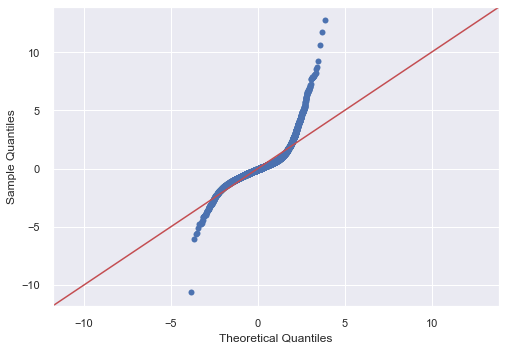

In [78]:
fig = sm.graphics.qqplot(model_train_v3.resid, dist=stats.norm, line='45', fit=True)

### check homoscedasticity

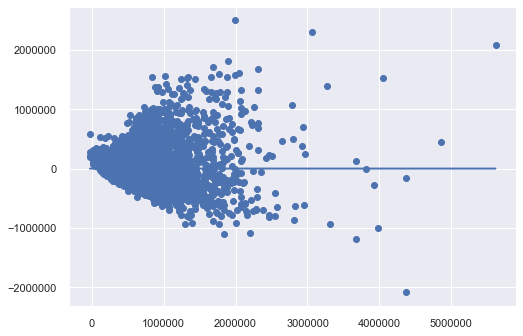

In [79]:
plt.scatter(model_train_v3.predict(train[x_cols]), model_train_v3.resid)
plt.plot(model_train_v3.predict(train[x_cols]), [0 for i in range(len(train))])

### model refinement

In [80]:
for i in range(90, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, kc11_acat_renamed['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [81]:
kc12_acat_renamed = kc11_acat_renamed[kc11_acat_renamed['price']<1200000]
print(f'Percent removed: {(kc11_acat_renamed.shape[0] - kc12_acat_renamed.shape[0])/kc11_acat_renamed.shape[0]:.3f}')
train, test = train_test_split(kc12_acat_renamed)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_train_v4 = ols(formula=formula, data=train).fit()
model_train_v4.summary()

Percent removed: 0.047


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     788.5
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:46:05   Log-Likelihood:            -2.0315e+05
No. Observations:               15434   AIC:                         4.064e+05
Df Residuals:                   15396   BIC:                         4.067e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.611e+07   3.96e+05    -65.861      0.000   -2.69e+07   -2.53e+07
sqft_living         119.6268      2.596     46.079      0.000     114.538     124.716
sqft_lot              0.2618      0.035      7.457      0.000       0.193       0.331
sqft_basement        -3.6152      3.433     -1.053      0.292     -10.345       3.115
sqft_living15        83.6739      2.623     31.906      0.000      78.533      88.814
sqft_lot15           -0.3102      0.054     -5.702      0.000      -0.417      -0.204
yr_built          -1008.4971     51.836    -19.456      0.000   -1110.102    -906.893
yr_renovated_korg    25.3111      3.129      8.089      0.000      19.177      31.445
lat                5.914e+05   7619.204     77.625      0.000    5.77e+05    6.06e+05
bedrooms_5        -2.785e+04   4295.476     -6.483      0.000   -3.63e+04   -1.94e+04
bedrooms_6        -4.663e+04   9852.733     -4.733      0.000   -6.59e+04   -2.73e+04
bedrooms_7        -8.744e+04   2.52e+04     -3.475      0.001   -1.37e+05   -3.81e+04
bathrooms_375      9.274e+04   1.55e+04      5.974      0.000    6.23e+04    1.23e+05
bathrooms_40        1.77e+04   1.65e+04      1.072      0.284   -1.47e+04    5.01e+04
bathrooms_425       1.54e+04   2.51e+04      0.612      0.540   -3.39e+04    6.47e+04
bathrooms_45       2068.3631   2.24e+04      0.092      0.926   -4.19e+04     4.6e+04
bathrooms_475     -9.124e+04   5.68e+04     -1.606      0.108   -2.03e+05    2.01e+04
bathrooms_50       8.786e+04   5.67e+04      1.550      0.121   -2.33e+04    1.99e+05
bathrooms_525      7.123e+04   6.34e+04      1.124      0.261    -5.3e+04    1.95e+05
bathrooms_55       -1.86e+05   1.27e+05     -1.466      0.143   -4.35e+05    6.26e+04
bathrooms_575     -3.793e+05   1.29e+05     -2.940      0.003   -6.32e+05   -1.26e+05
bathrooms_60      -5.055e+05   1.42e+05     -3.560      0.000   -7.84e+05   -2.27e+05
bathrooms_80      -7.503e-10   1.83e-10     -4.098      0.000   -1.11e-09   -3.91e-10
floors_15           3.33e+04   3974.086      8.380      0.000    2.55e+04    4.11e+04
floors_20          5.125e+04   3154.368     16.248      0.000    4.51e+04    5.74e+04
floors_25          1.092e+05    1.4e+04      7.773      0.000    8.16e+04    1.37e+05
floors_30          1.237e+05   6855.512     18.037      0.000     1.1e+05    1.37e+05
floors_35          1.613e+05   5.65e+04      2.855      0.004    5.05e+04    2.72e+05
waterfront_10      1.326e+05   2.09e+04      6.333      0.000    9.16e+04    1.74e+05
view_10            9.018e+04   8710.150     10.353      0.000    7.31e+04    1.07e+05
view_20            7.586e+04   5254.525     14.438      0.000    6.56e+04    8.62e+04
view_30            8.258e+04   7959.076     10.375      0.000     6.7e+04    9.82e+04
view_40            1.644e+05   1.37e+04     12.042      0.000    1.38e+05

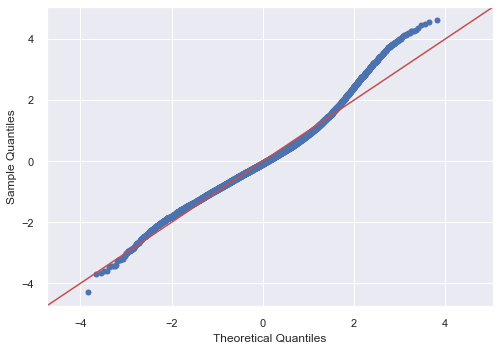

In [82]:
fig = sm.graphics.qqplot(model_train_v4.resid, dist=stats.norm, line='45', fit=True)

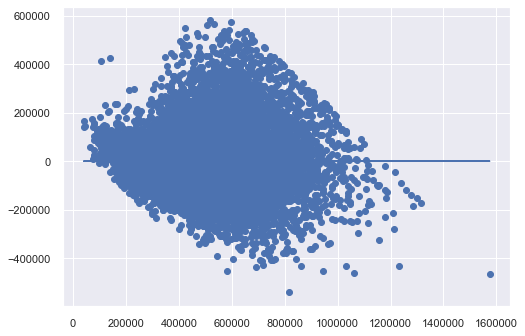

In [83]:
plt.scatter(model_train_v4.predict(train[x_cols]), model_train_v4.resid)
plt.plot(model_train_v4.predict(train[x_cols]), [0 for i in range(len(train))])

## conclusion (baseline model):

final features: 

* ('waterfront', 1.1801071757045956), 
* ('view', 1.4145539358745942), 
* ('condition', 7.710200530938308), 
* ('mo_sold', 4.96727802059445), 
* ('sqft_above', 4.92288516563684), 
* ('sqft_basement', 1.61800036410134), 
* ('sqft_lot15', 1.2700445018994704), 
* ('yr_renovated_korg', 1.0474576078963587)